# Customer Purchase Propensity Predictor

## Introduction


This notebook represents a deep dive into analyzing user session data to understand the complex factors influencing purchase decisions. Our core mission here is to move beyond simply tracking sales figures and instead build a predictive understanding of *why* a user might decide to purchase within a given session.

The dataset we're working with provides a rich collection of behavioral and technical attributes for individual user sessions. By analyzing these attributes, we aim to uncover the specific signals that differentiate a session ending in a completed purchase from one that does not. The insights derived from this analysis are crucial for various commercial teams, informing decisions related to marketing campaign targeting, optimizing the user interface and experience to reduce friction, and implementing personalized strategies to encourage conversion.

Our guiding research question, framed specifically for the online shopping environment, is:

> **Given the diverse interactions and technical details of a user session on an online shop, which features are the strongest predictors of purchase propensity, and how can we translate these predictions into tangible improvements for user experience and marketing efforts to elevate conversion rates?**

Through the steps outlined in this notebook – including exploratory data analysis, feature engineering techniques like clustering to identify user segments, and the application and evaluation of classification models – I aim to build a robust predictive model. This model will serve as a  tool to proactively identify high-potential sessions and implement data-driven interventions to guide users towards a successful purchase, ultimately driving revenue growth.

## Imports

Importing relevant Python libraries and modules and loading the data into a dataframe.

In [19]:
# Importing libraries and modules.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [21]:
df = pd.read_csv('/content/drive/MyDrive/online_shoppers_intention.csv')
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


## Exploratory Data Analysis

To gain a foundational understanding of the dataset and identify potential predictors of purchase propensity, we will perform some exploratory data analysis (EDA). This will involve examining the structure, distributions, and relationships between variables. We will look at descriptive statistics, visualize feature distributions and correlations, and specifically explore how different behavioral and technical attributes relate to our target variable, `Revenue`. The goal is to uncover patterns, identify anomalies, and build hypotheses that will guide subsequent feature engineering and model building steps aimed at predicting which user sessions are most likely to result in a purchase.


### Data exploration

To understand the dataset and identify potential predictors of purchase propensity, we will perform initial data exploration. This will involve examining the dataset's shape, data types, and descriptive statistics. We will also look at value counts for categorical features, calculate the correlation matrix for numerical columns, group data by the 'Revenue' column to observe differences, and check for any missing values. This step aims to provide a foundational understanding of the data distribution and relationships.


**Step 1:**
Displaying the shape, data types, descriptive statistics for numerical columns, and value counts for categorical columns to start the exploratory data analysis.



In [22]:
print("Shape of the dataframe:", df.shape)
print("\nData types of columns:\n", df.dtypes)

numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
print("\nDescriptive statistics for numerical columns:\n")
display(df[numerical_cols].describe())

categorical_cols = df.select_dtypes(include=['object', 'bool']).columns
print("\nValue counts for categorical columns:\n")
for col in categorical_cols:
    print(f"\nValue counts for {col}:\n")
    display(df[col].value_counts())

Shape of the dataframe: (12330, 18)

Data types of columns:
 Administrative               int64
Administrative_Duration    float64
Informational                int64
Informational_Duration     float64
ProductRelated               int64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                       object
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                 object
Weekend                       bool
Revenue                       bool
dtype: object

Descriptive statistics for numerical columns:



,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000



Value counts for categorical columns:


Value counts for Month:



,count
Month,
May,3364
Nov,2998
Mar,1907
Dec,1727
Oct,549
Sep,448
Aug,433
Jul,432
June,288



Value counts for VisitorType:



,count
VisitorType,
Returning_Visitor,10551
New_Visitor,1694
Other,85



Value counts for Weekend:



,count
Weekend,
False,9462
True,2868



Value counts for Revenue:



,count
Revenue,
False,10422
True,1908


**Step 2:**
Calculating and displaying the correlation matrix for the numerical columns to understand the linear relationships between them, which is step 5 of the subtask.



In [23]:
print("\nCorrelation matrix for numerical columns:\n")
display(df[numerical_cols].corr())


Correlation matrix for numerical columns:



,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
Administrative,1.000000,0.601583,0.376850,0.255848,0.431119,0.373939,-0.223563,-0.316483,0.098990,-0.094778,-0.006347,-0.025035,-0.005487,-0.033561
Administrative_Duration,0.601583,1.000000,0.302710,0.238031,0.289087,0.355422,-0.144170,-0.205798,0.067608,-0.073304,-0.007343,-0.015392,-0.005561,-0.014376
Informational,0.376850,0.302710,1.000000,0.618955,0.374164,0.387505,-0.116114,-0.163666,0.048632,-0.048219,-0.009527,-0.038235,-0.029169,-0.034491
Informational_Duration,0.255848,0.238031,0.618955,1.000000,0.280046,0.347364,-0.074067,-0.105276,0.030861,-0.030577,-0.009579,-0.019285,-0.027144,-0.024675
ProductRelated,0.431119,0.289087,0.374164,0.280046,1.000000,0.860927,-0.204578,-0.292526,0.056282,-0.023958,0.004290,-0.013146,-0.038122,-0.043064
ProductRelated_Duration,0.373939,0.355422,0.387505,0.347364,0.860927,1.000000,-0.184541,-0.251984,0.052823,-0.036380,0.002976,-0.007380,-0.033091,-0.036377
BounceRates,-0.223563,-0.144170,-0.116114,-0.074067,-0.204578,-0.184541,1.000000,0.913004,-0.119386,0.072702,0.023823,-0.015772,-0.006485,0.078286
ExitRates,-0.316483,-0.205798,-0.163666,-0.105276,-0.292526,-0.251984,0.913004,1.000000,-0.174498,0.102242,0.014567,-0.004442,-0.008907,0.078616
PageValues,0.098990,0.067608,0.048632,0.030861,0.056282,0.052823,-0.119386,-0.174498,1.000000,-0.063541,0.018508,0.045592,0.011315,0.012532
SpecialDay,-0.094778,-0.073304,-0.048219,-0.030577,-0.023958,-0.036380,0.072702,0.102242,-0.063541,1.000000,0.012652,0.003499,-0.016098,0.052301


**Step 3:**
Grouping the data by the `Revenue` column and calculating the mean of the numerical features for each group to see how feature values differ for users who generated revenue versus those who did not, and then exploring the relationship between categorical features and the `Revenue` column using cross-tabulation.



In [24]:
print("\nMean of numerical features grouped by Revenue:\n")
display(df[numerical_cols.tolist() + ['Revenue']].groupby('Revenue').mean())

print("\nRelationship between categorical features and Revenue (Cross-tabulation):\n")
for col in categorical_cols:
    if col != 'Revenue':
        print(f"\nCross-tabulation for {col} and Revenue:\n")
        display(pd.crosstab(df[col], df['Revenue']))


Mean of numerical features grouped by Revenue:



,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
Revenue,,,,,,,,,,,,,,
False,2.117732,73.740111,0.451833,30.236237,28.714642,1069.987809,0.025317,0.047378,1.975998,0.068432,2.129726,2.339474,3.159278,4.078392
True,3.393606,119.483244,0.786164,57.611427,48.210168,1876.209615,0.005117,0.019555,27.264518,0.023166,2.092767,2.453354,3.082285,4.021488



Relationship between categorical features and Revenue (Cross-tabulation):


Cross-tabulation for Month and Revenue:



Revenue,False,True
Month,,
Aug,357,76
Dec,1511,216
Feb,181,3
Jul,366,66
June,259,29
Mar,1715,192
May,2999,365
Nov,2238,760
Oct,434,115



Cross-tabulation for VisitorType and Revenue:



Revenue,False,True
VisitorType,,
New_Visitor,1272,422
Other,69,16
Returning_Visitor,9081,1470



Cross-tabulation for Weekend and Revenue:



Revenue,False,True
Weekend,,
False,8053,1409
True,2369,499


**STEP 4:**
Checking for missing values in the DataFrame and reporting
 the count of missing values per column.



In [25]:
missing_values = df.isnull().sum()
print("Missing values per column:\n", missing_values)

Missing values per column:
 Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64


### Data Visualizations

Following the initial data exploration, we will create visualizations to further understand the data and identify potential predictors of purchase propensity. This will include using box plots to identify potential outliers in numerical features, histograms to visualize their distributions, and count plots for categorical features to show the frequency of each category. We will also create box plots of numerical features against the `Revenue` target variable and calculate the proportion of revenue for each category in categorical features to visualize these relationships. Finally, a heatmap of the correlation matrix for numerical features will be generated to visualize their interrelationships.

**Step 5:**
There are no missing values in the dataset, so the next step is to identify potential outliers in the numerical columns using box plots.



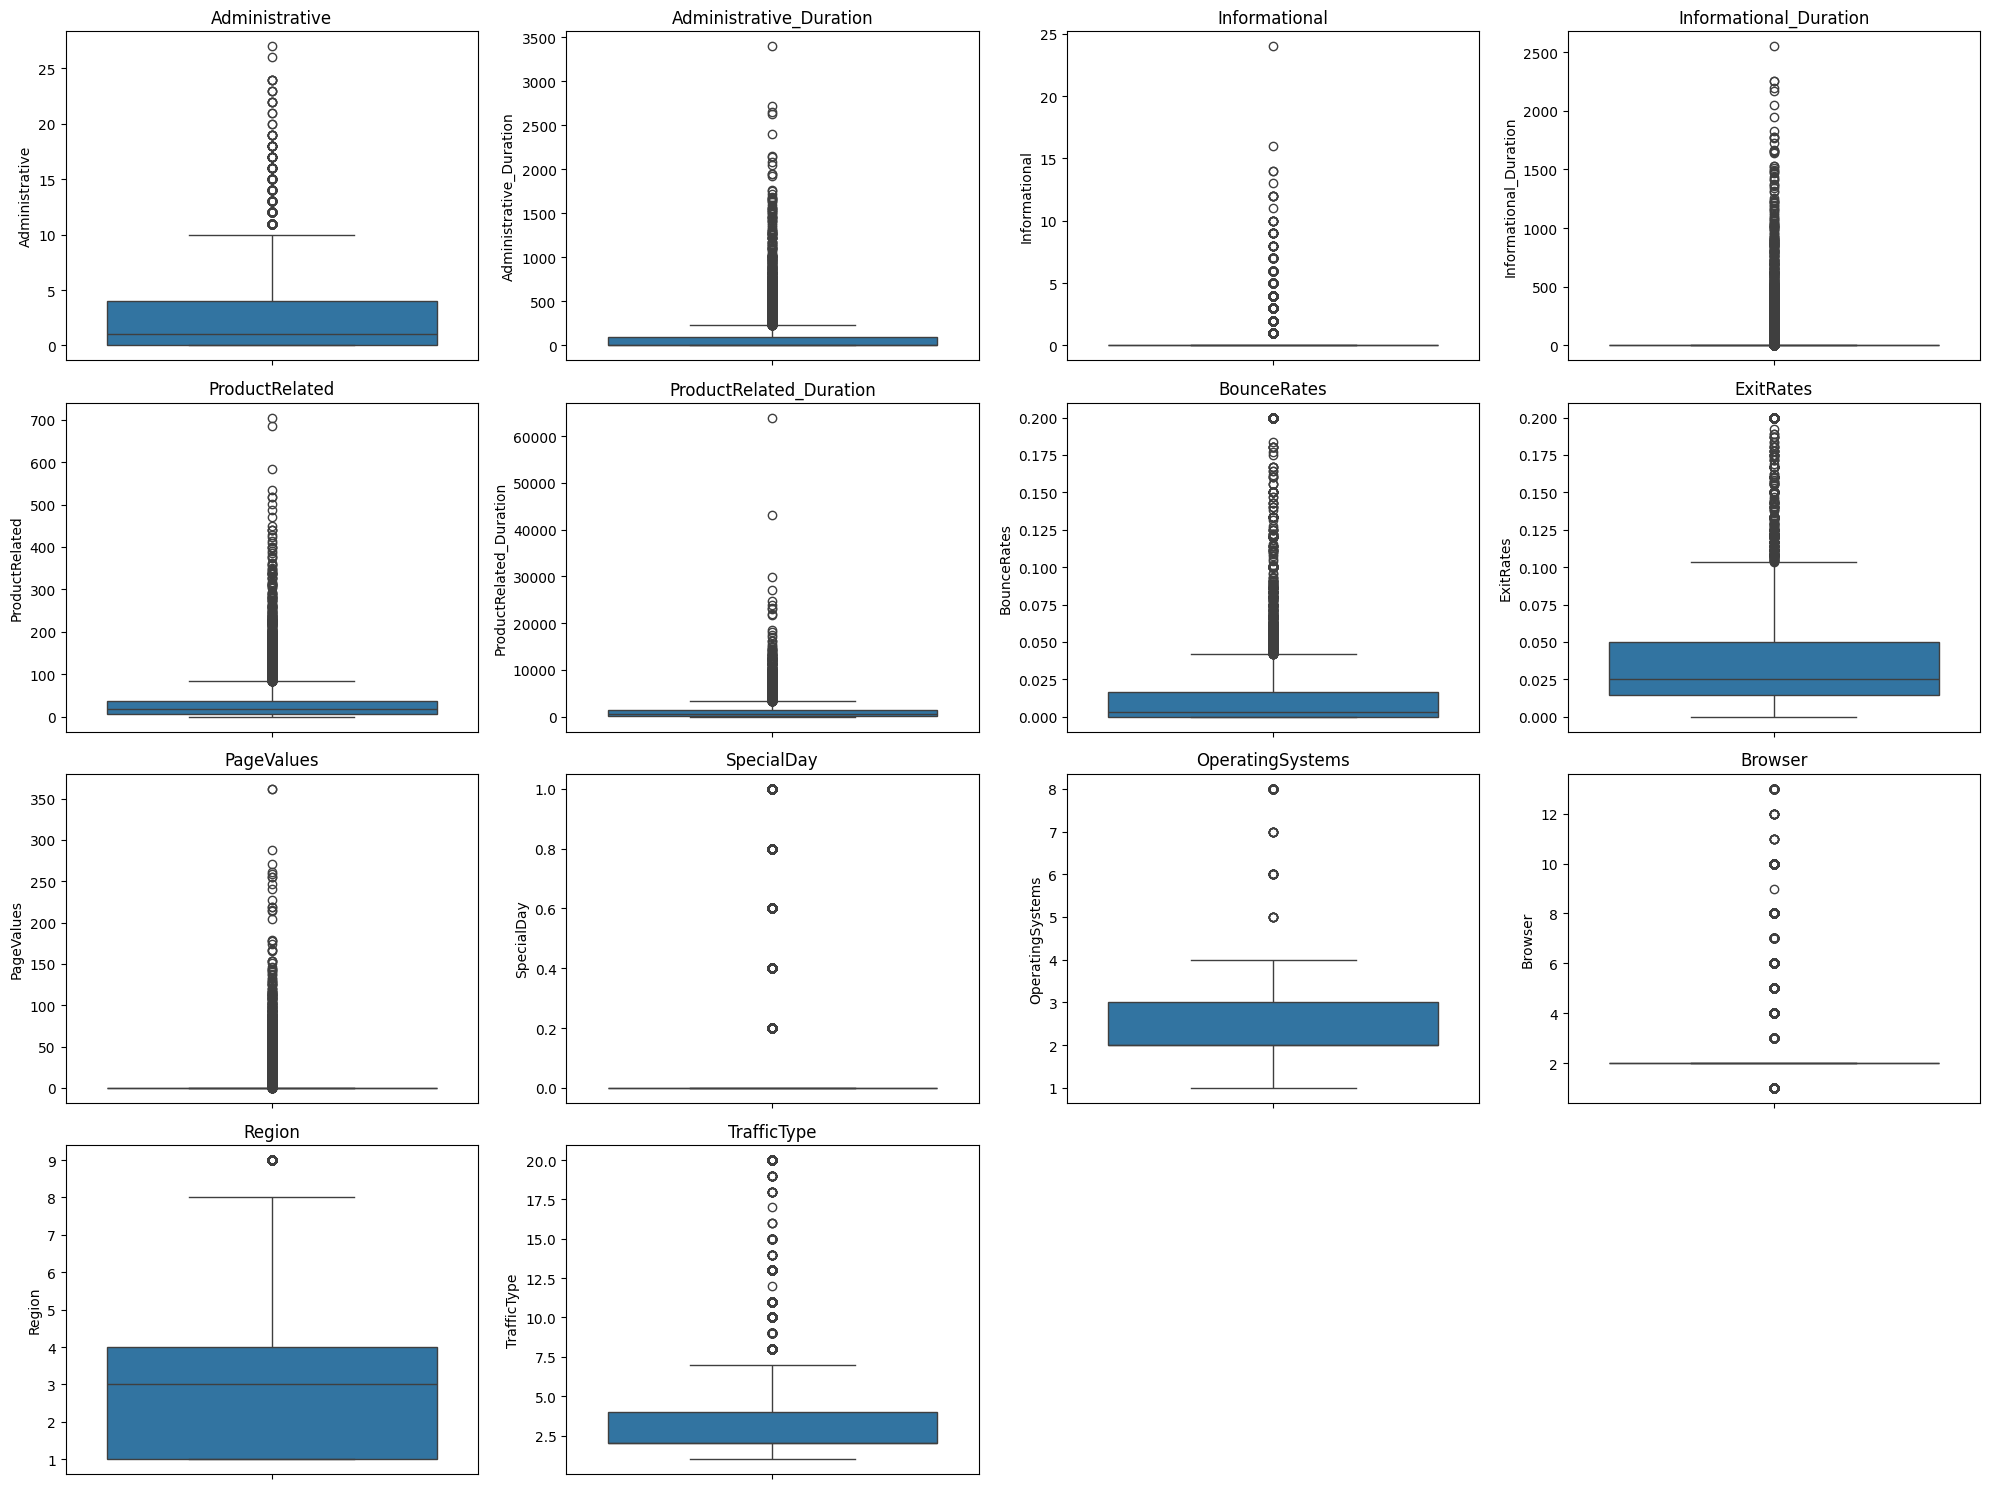

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

plt.figure(figsize=(20, 15))
for i, col in enumerate(numerical_cols):
    plt.subplot(4, 4, i + 1)
    sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

**Step 6:**
Creating histograms for all numerical columns to visualize their distributions



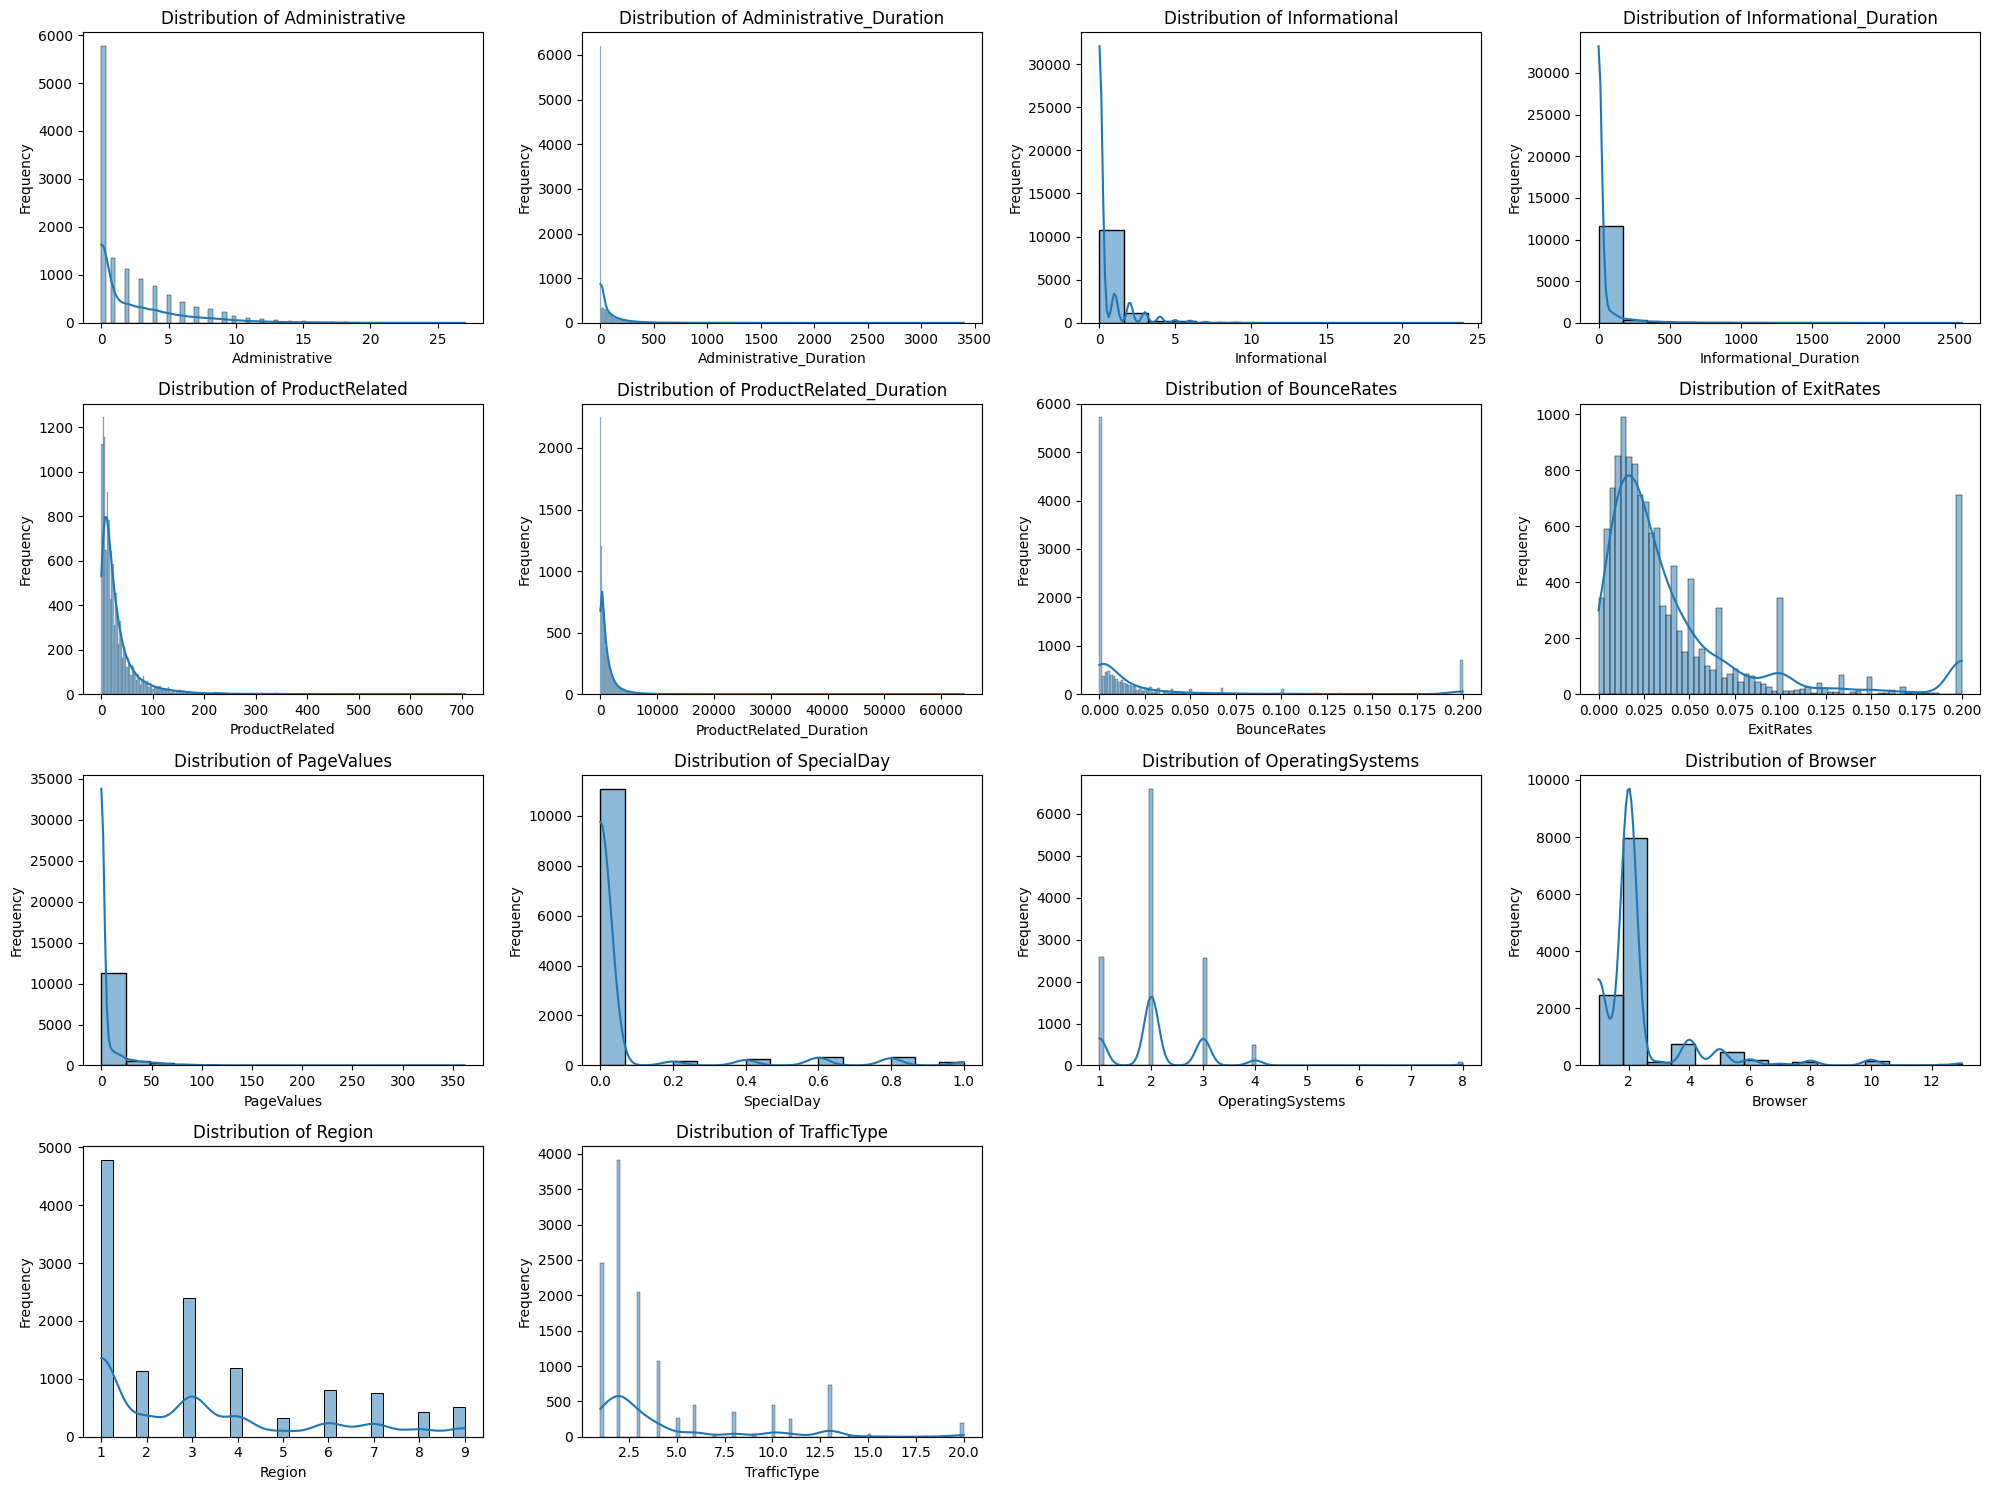

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

plt.figure(figsize=(20, 15))
for i, col in enumerate(numerical_cols):
    plt.subplot(4, 4, i + 1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

**Step 7:**
Creating count plots for all categorical columns to visualize the frequency of each category.



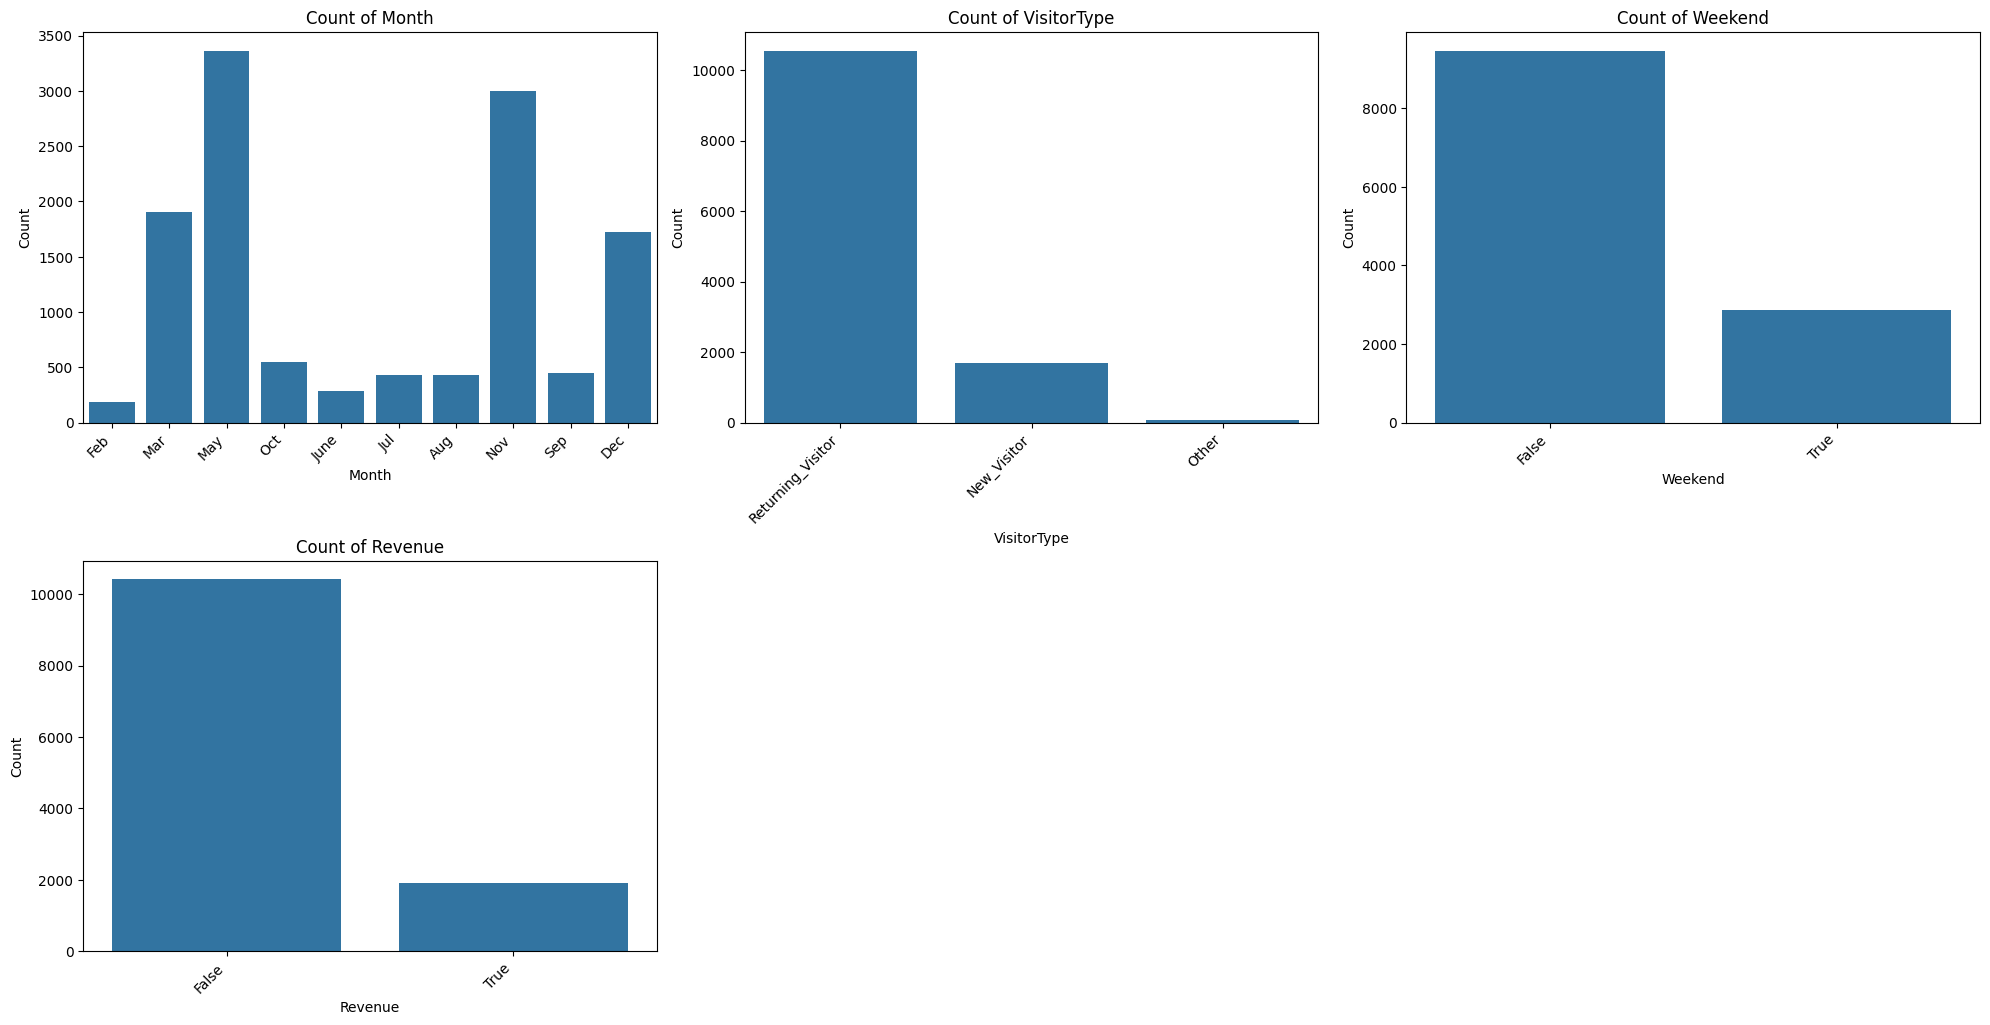

In [28]:
categorical_cols = df.select_dtypes(include=['object', 'bool']).columns

plt.figure(figsize=(20, 15))
for i, col in enumerate(categorical_cols):
    plt.subplot(3, 3, i + 1)
    sns.countplot(data=df, x=col)
    plt.title(f'Count of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**Step 8:**
Creating box plots for numerical features against the `Revenue` target variable.



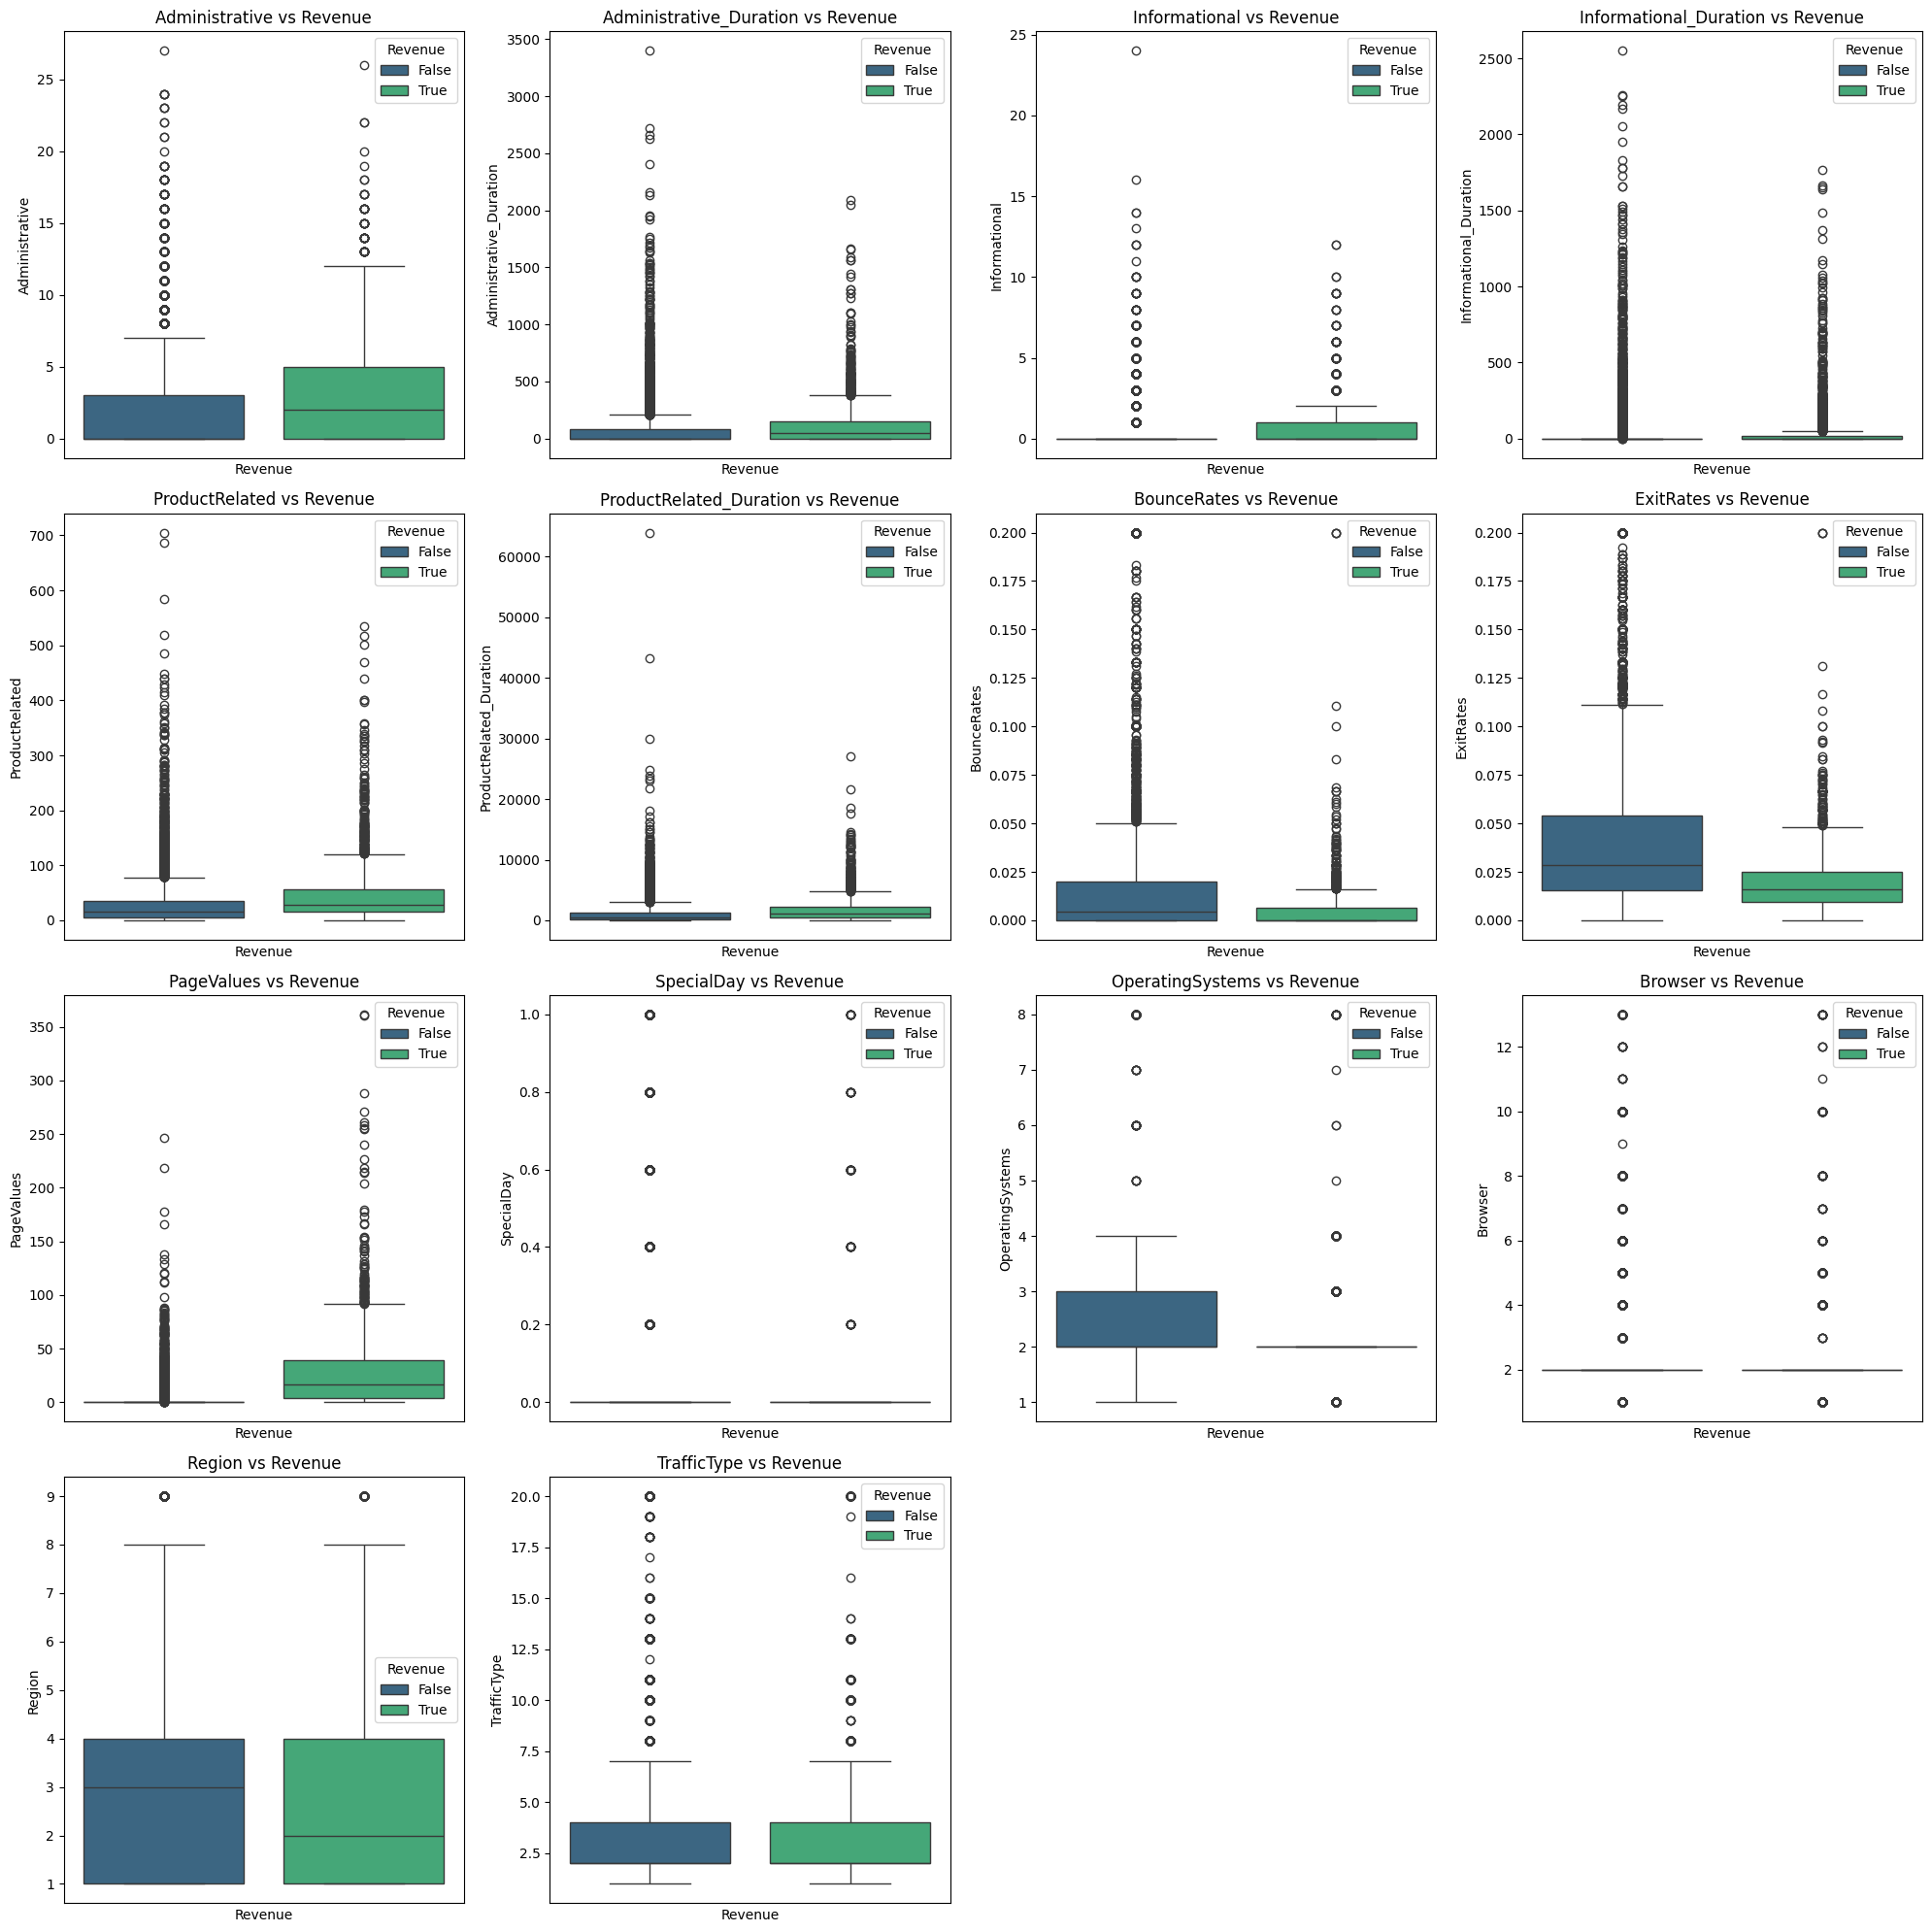

In [29]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

plt.figure(figsize=(20, 20))
for i, col in enumerate(numerical_cols):
    plt.subplot(4, 4, i + 1)
    sns.boxplot(data=df, x='Revenue', y=col, hue='Revenue', palette='viridis')
    plt.title(f'{col} vs Revenue')
    plt.ylabel(col)
    plt.xticks([])

plt.tight_layout()
plt.show()

**Step 9:**
Calculating the proportion of `Revenue=True` for each category in categorical columns and create bar plots to show the relationship between categorical features and the proportion of sessions resulting in Revenue



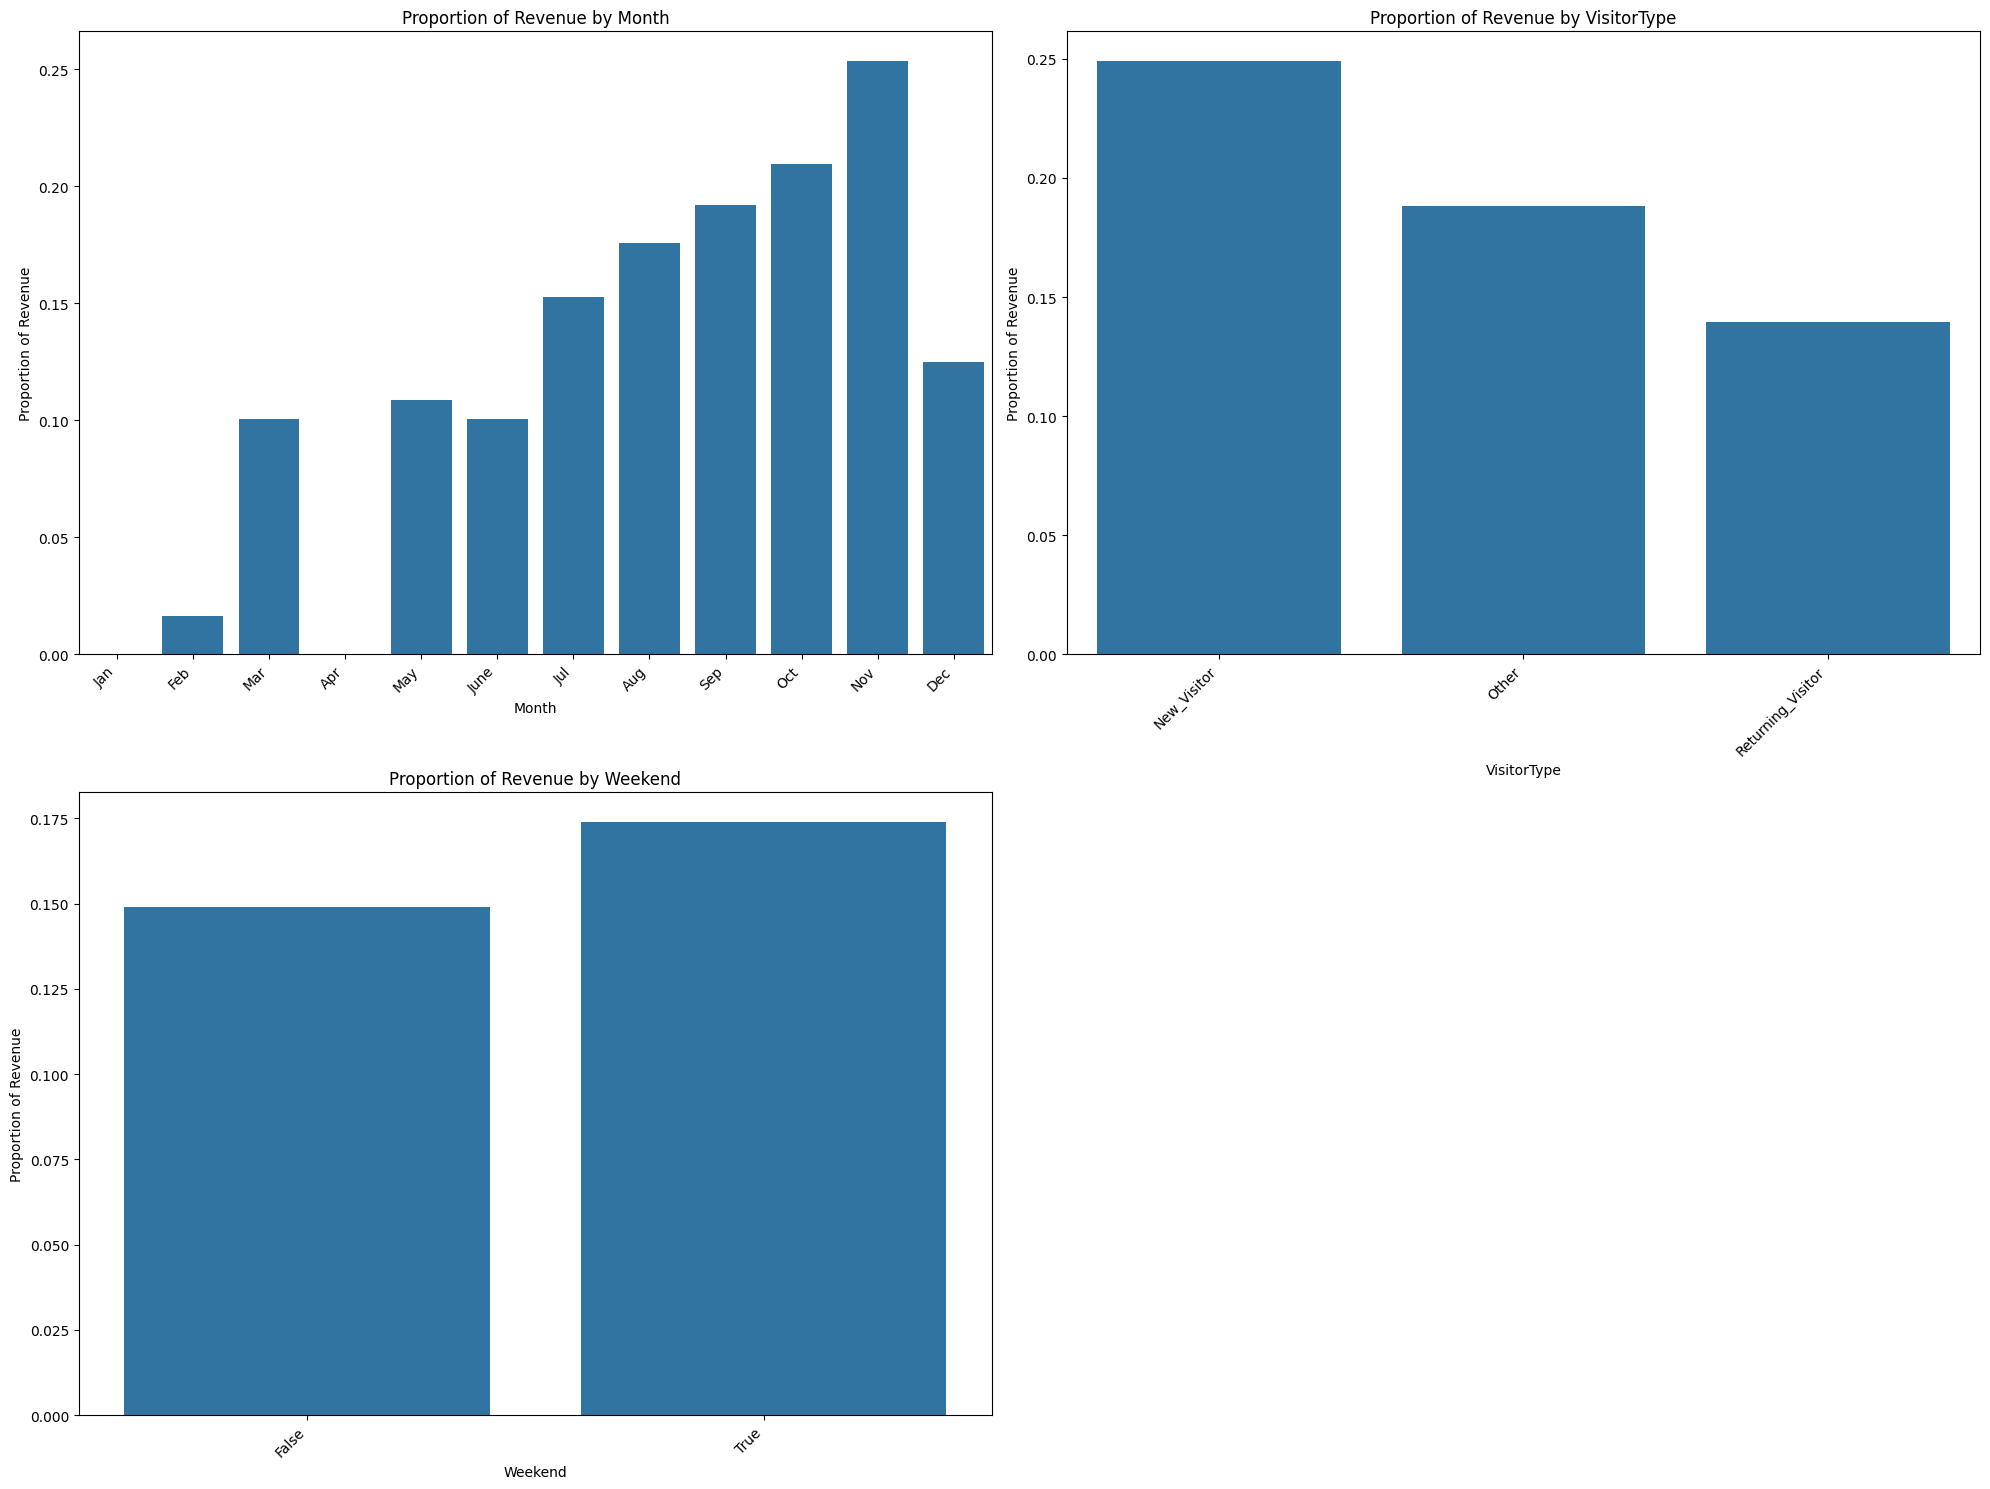

In [30]:
# Define the correct order of months
month_order = [
    'Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'
]

categorical_cols = df.select_dtypes(include=['object', 'bool']).columns
categorical_cols = categorical_cols.drop('Revenue') # Exclude the target variable itself

plt.figure(figsize=(20, 15))
for i, col in enumerate(categorical_cols):
    revenue_proportion = df.groupby(col)['Revenue'].mean().reset_index()

    # Check if the current column is 'Month' and if it's the original 'Month' column
    # before any encoding or processing that might change its name
    if col == 'Month' and col in df.columns:
        # Convert 'Month' column to categorical with the specified order
        revenue_proportion[col] = pd.Categorical(revenue_proportion[col], categories=month_order, ordered=True)
        # Sort the DataFrame by the ordered categorical column before plotting
        revenue_proportion = revenue_proportion.sort_values(col)


    plt.subplot(2, 2, i + 1)
    # Use the sorted DataFrame for plotting
    sns.barplot(data=revenue_proportion, x=col, y='Revenue')
    plt.title(f'Proportion of Revenue by {col}')
    plt.xlabel(col)
    plt.ylabel('Proportion of Revenue')
    plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**Step 10:**
Creating a heatmap of the correlation matrix for numerical features to visualize the relationships between them.



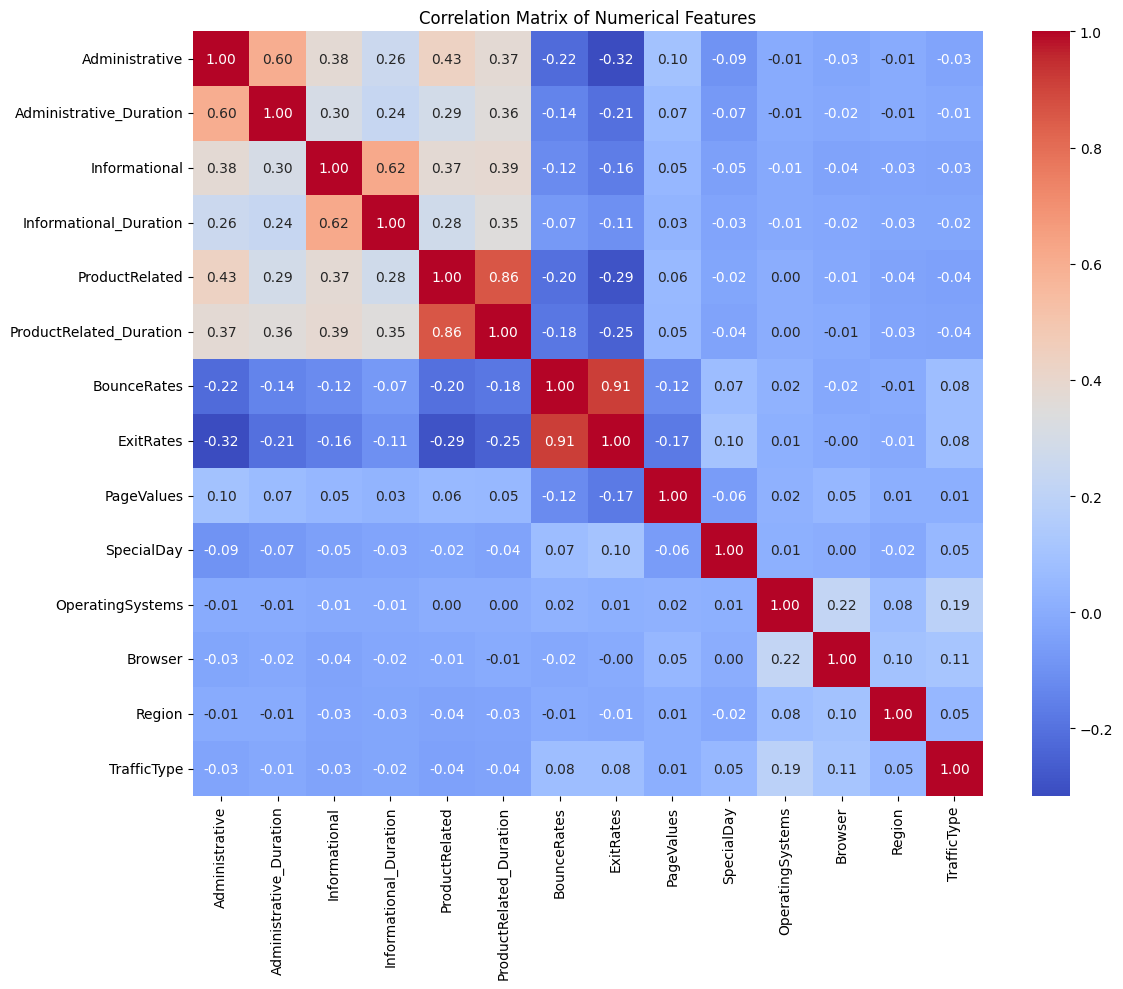

In [31]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

plt.figure(figsize=(12, 10))
correlation_matrix = df[numerical_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.tight_layout()
plt.show()

**Step 11:** Analyzing key features with significant differences between revenue and non-revenue sessions, using prior EDA and visualizations.


In [32]:
print("Key Features and their relationship with Revenue:")

print("\nNumerical Features:")
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
numerical_revenue_means = df[numerical_cols.tolist() + ['Revenue']].groupby('Revenue').mean()
print("Mean of numerical features grouped by Revenue:")
display(numerical_revenue_means)

print("\nCorrelation Matrix with Revenue (for numerical features):")
correlation_with_revenue = df[numerical_cols.tolist() + ['Revenue']].corr()['Revenue'].sort_values(ascending=False)
display(correlation_with_revenue)

print("\nCategorical Features:")
categorical_cols = df.select_dtypes(include=['object', 'bool']).columns
for col in categorical_cols:
    if col != 'Revenue':
        print(f"\nProportion of Revenue by {col}:")
        revenue_proportion = df.groupby(col)['Revenue'].mean().reset_index()
        display(revenue_proportion)

Key Features and their relationship with Revenue:

Numerical Features:
Mean of numerical features grouped by Revenue:


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
Revenue,,,,,,,,,,,,,,
False,2.117732,73.740111,0.451833,30.236237,28.714642,1069.987809,0.025317,0.047378,1.975998,0.068432,2.129726,2.339474,3.159278,4.078392
True,3.393606,119.483244,0.786164,57.611427,48.210168,1876.209615,0.005117,0.019555,27.264518,0.023166,2.092767,2.453354,3.082285,4.021488



Correlation Matrix with Revenue (for numerical features):


,Revenue
Revenue,1.000000
PageValues,0.492569
ProductRelated,0.158538
ProductRelated_Duration,0.152373
Administrative,0.138917
Informational,0.095200
Administrative_Duration,0.093587
Informational_Duration,0.070345
Browser,0.023984
TrafficType,-0.005113



Categorical Features:

Proportion of Revenue by Month:


,Month,Revenue
0,Aug,0.175520
1,Dec,0.125072
2,Feb,0.016304
3,Jul,0.152778
4,June,0.100694
5,Mar,0.100682
6,May,0.108502
7,Nov,0.253502
8,Oct,0.209472
9,Sep,0.191964



Proportion of Revenue by VisitorType:


,VisitorType,Revenue
0,New_Visitor,0.249115
1,Other,0.188235
2,Returning_Visitor,0.139323



Proportion of Revenue by Weekend:


,Weekend,Revenue
0,False,0.148911
1,True,0.173989


### Feature Importance Analysis

We proceed with feature importance analysis to identifying which features will have the most significant impact on model performance

**Step 12:** First we prepare the data for modeling by separating features and the target variable, and encoding categorical features.

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Separate features (X) and target variable (y)
X = df.drop('Revenue', axis=1)
y = df['Revenue']

# Encode categorical features
categorical_cols = X.select_dtypes(include=['object', 'bool']).columns
for col in categorical_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

**Step 13:** Next, we perform feature importance analysis using RandomForestClassifier -- a tree-based model, suitable for identifying important features.

Feature Importances:


,0
PageValues,0.385856
ExitRates,0.090085
ProductRelated_Duration,0.086819
ProductRelated,0.072641
Administrative_Duration,0.059551
BounceRates,0.056617
Administrative,0.041963
Month,0.041263
TrafficType,0.030059
Region,0.030025


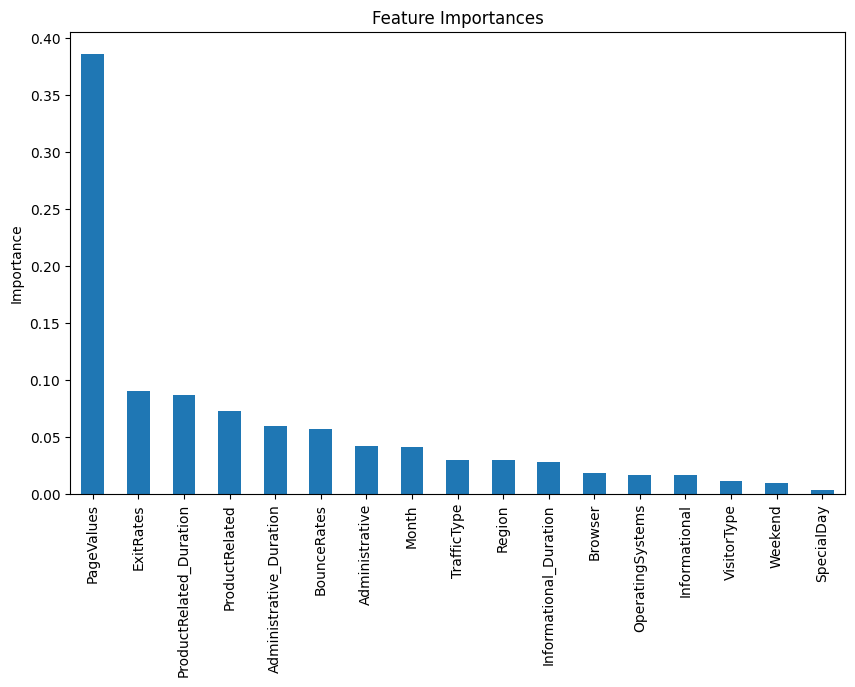

In [34]:
from sklearn.ensemble import RandomForestClassifier

# Initialize and train a RandomForestClassifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Get feature importances
feature_importances = pd.Series(model.feature_importances_, index=X.columns)

# Sort feature importances in descending order
sorted_feature_importances = feature_importances.sort_values(ascending=False)

# Print sorted feature importances
print("Feature Importances:")
display(sorted_feature_importances)

# Visualize feature importances
plt.figure(figsize=(10, 6))
sorted_feature_importances.plot(kind='bar')
plt.title('Feature Importances')
plt.ylabel('Importance')
plt.show()

### Summary Notes

Our initial exploration of user session data through EDA has yielded critical insights into the characteristics that distinguish sessions resulting in revenue from those that don't. Key findings include:

*   **Dataset Landscape:** The dataset comprises 12,330 user sessions, each described by 18 different attributes. We observed a mix of numerical metrics (like page view counts and durations) and categorical data (like visitor type, operating system, and month). There are no missing values, which simplifies the data cleaning phase, although several numerical features show evidence of outliers that may warrant attention in future modeling steps.

*   **Engagement is Paramount:** Sessions where a purchase occurred consistently show higher average values across engagement metrics. Users who generated revenue tended to spend more time and view more pages within `Administrative`, `Informational`, and especially `ProductRelated` sections. Crucially, these revenue-generating sessions also exhibit significantly *lower* `BounceRates` and `ExitRates`, indicating more focused and less abrupt navigation away from the site.

*   **PageValue's Predictive Power:** The `PageValues` feature, which likely reflects the importance or value of the pages visited before conversion, shows the strongest positive linear correlation with `Revenue` among numerical features. This highlights its significance as a direct indicator of a session's potential value.

*   **Visitor Type Matters:** While `Returning_Visitor` sessions make up the vast majority of the dataset and contribute the most in absolute numbers, our analysis indicates that `New_Visitor` and `Other` visitor types show a *higher proportion* of sessions resulting in revenue relative to their total number. This suggests different conversion dynamics might be at play for different visitor segments.

*   **Seasonal and Temporal Trends:** Sessions occurring in **October** and **November** stand out with the highest proportions of revenue, strongly aligning with peak holiday shopping seasons and major sales events like Black Friday, Cyber Monday and Diwali. Sessions on weekdays also appear slightly more likely to result in revenue compared to weekends.

*   **Features with Less Direct Impact:** Features such as `OperatingSystems`, `Browser`, `Region`, and `TrafficType` showed only weak direct linear correlations with `Revenue` in the initial analysis. While they might play indirect roles or be important in combination with other features, they don't appear to be primary individual drivers of revenue based on this initial look.

**Synthesis for Strategy:**

The EDA strongly suggests that user engagement (`BounceRates`, `ExitRates`, page views, durations) and high `PageValues` are the most prominent signals of purchase propensity. Recognizing the higher conversion *proportion* among `New_Visitor` and `Other` types, despite the volume from `Returning_Visitor`s, indicates distinct user journeys to consider. The clear seasonality peaks in October/November underscore the importance of optimizing the platform and marketing efforts specifically for these periods.

**Next Steps:**

Based on these findings, the next phases will involve:

1.  Leveraging the insights from engagement metrics, `PageValues`, `VisitorType`, and temporal features in our feature engineering and selection processes.

2.  Considering techniques to handle the class imbalance in the `Revenue` target variable during model building.

3.  Proceeding to model selection to build a predictive model for purchase propensity.

4. Addressing data characteristics like outliers if deemed necessary for chosen models.
  

## Feature Engineering

Based on our initial EDA, it's clear that user behavior and session characteristics are complex and likely involve non-linear relationships. To capture more nuanced patterns beyond simple individual features, we will employ some **Feature Engineering**.

### K-Means Clustering

We will use K-Means clustering to group similar user sessions together based on their attributes. The intuition here is that distinct clusters of behavior might exist (e.g., highly engaged shoppers vs. casual browsers), and the cluster a session belongs to could be a powerful predictor of purchase propensity. The resulting cluster assignments will be added as a new feature to our dataset, enriching our model's ability to differentiate between users with varying likelihoods of converting.

**Step 14:** Preprocessing Categorical Features using One-Hot Encoding


In [35]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd # Ensure pandas is imported

# Identify categorical columns again, excluding 'Revenue'
categorical_cols = df.select_dtypes(include=['object', 'bool']).columns.tolist()
if 'Revenue' in categorical_cols:
    categorical_cols.remove('Revenue')

# Identify numerical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Identify the remainder column(s) - in this case, it's 'Revenue'
# Get all columns in the original DataFrame
all_original_cols = df.columns.tolist()
# Find columns that are not in numerical_cols or the specified categorical_cols
remainder_cols = [col for col in all_original_cols if col not in numerical_cols and col not in categorical_cols]

# Create a ColumnTransformer to apply One-Hot Encoding to categorical columns
# We explicitly handle the remainder column(s) if needed, or rely on remainder='passthrough'
# and make sure our column names list is correct.
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ],
    remainder='passthrough' # This passes through 'Revenue'
)

# Apply the preprocessing
df_processed_array = preprocessor.fit_transform(df)

# Convert the processed data back to a DataFrame for easier handling
# Get the feature names after one-hot encoding
numerical_feature_names = numerical_cols
# Need to handle potential Sparse output from OneHotEncoder if categories are numerous.
# .get_feature_names_out() works for dense or sparse output.
categorical_feature_names = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_cols)

# Construct the complete list of column names, including the remainder columns
all_feature_names = numerical_feature_names + list(categorical_feature_names) + remainder_cols

df_processed = pd.DataFrame(df_processed_array, columns=all_feature_names)

**Step 15:** Determining the Optimal Number of Clusters (K) using the Elbow Method.

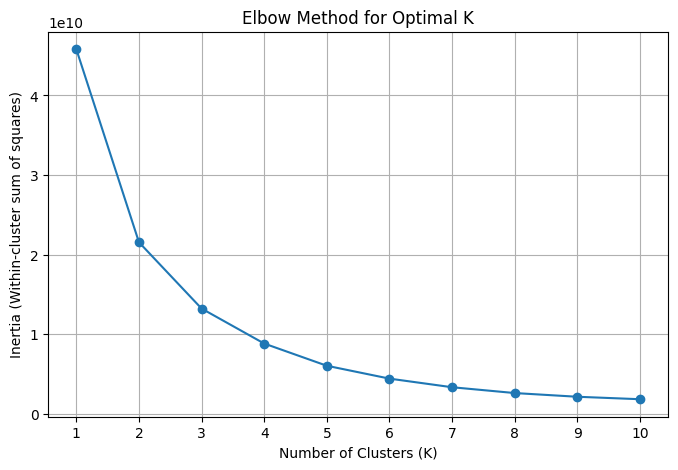

In [36]:
# We'll look at the within-cluster sum of squares (inertia) for different values of K
inertia = []
k_range = range(1, 11)

# The processed DataFrame now includes 'Revenue', so we need to drop it before clustering.
df_features_for_clustering = df_processed.drop('Revenue', axis=1)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_features_for_clustering)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia (Within-cluster sum of squares)')
plt.xticks(k_range)
plt.grid(True)
plt.show()

optimal_k = 3

**Step 16:** Applying K-Means Clustering

In [37]:
# Apply the clustering to the features-only DataFrame
kmeans_model = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
kmeans_model.fit(df_features_for_clustering)

# Add cluster labels to the original DataFrame
df['Cluster'] = kmeans_model.labels_

print("\nCluster assignments added to the DataFrame.")
display(df.head())


Cluster assignments added to the DataFrame.


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue,Cluster
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False,2
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False,2
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False,2
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False,2
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False,2


**Step 17:** Analyzing the characteristics of the clusters and their relationship with Revenue

In [38]:
print(f"\nAnalysis of Clusters (K={optimal_k}):")

# Analyze numerical features by cluster
print("\nMean of Numerical Features per Cluster:")
# Select only the numerical columns present in the original df
display(df[numerical_cols + ['Cluster']].groupby('Cluster').mean())

# Analyze categorical features by cluster (show proportions)
print("\nProportion of Categories per Cluster:")
# Re-identify categorical columns from the original df, excluding 'Revenue'
original_categorical_cols = df.select_dtypes(include=['object', 'bool']).columns.tolist()
if 'Revenue' in original_categorical_cols:
    original_categorical_cols.remove('Revenue')

for col in original_categorical_cols:
    print(f"\nProportion of {col} per Cluster:")
    display(pd.crosstab(df['Cluster'], df[col], normalize='index'))

# Analyze the proportion of Revenue per Cluster
print("\nProportion of Revenue per Cluster:")
display(df.groupby('Cluster')['Revenue'].mean().reset_index())


Analysis of Clusters (K=3):

Mean of Numerical Features per Cluster:


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
Cluster,,,,,,,,,,,,,,
0,4.322874,154.799099,1.173583,84.629769,77.713057,3354.406498,0.007134,0.021679,8.009579,0.050709,2.137146,2.309717,3.094130,3.710020
1,7.439614,295.364891,2.748792,266.723094,236.106280,10886.174365,0.005940,0.019688,4.521370,0.030918,2.149758,2.309179,2.584541,3.618357
2,1.819651,62.035076,0.327289,19.966942,18.607864,576.473397,0.025455,0.047716,5.504257,0.064137,2.120922,2.367301,3.169213,4.148812



Proportion of Categories per Cluster:

Proportion of Month per Cluster:


Month,Aug,Dec,Feb,Jul,June,Mar,May,Nov,Oct,Sep
Cluster,,,,,,,,,,
0,0.033401,0.125000,0.004555,0.036437,0.017206,0.091599,0.227227,0.385628,0.047571,0.031377
1,0.038647,0.086957,0.000000,0.053140,0.043478,0.043478,0.106280,0.560386,0.024155,0.043478
2,0.035380,0.144082,0.017246,0.034394,0.024145,0.169213,0.285109,0.208929,0.044348,0.037154



Proportion of VisitorType per Cluster:


VisitorType,New_Visitor,Other,Returning_Visitor
Cluster,,,
0,0.048077,0.002024,0.949899
1,0.004831,0.004831,0.990338
2,0.157485,0.007884,0.834631



Proportion of Weekend per Cluster:


Weekend,False,True
Cluster,,
0,0.780870,0.219130
1,0.748792,0.251208
2,0.765152,0.234848



Proportion of Revenue per Cluster:


,Cluster,Revenue
0,0,0.251012
1,1,0.338164
2,2,0.132256


**Step 18:** Creating plots for the most important features, but separated by cluster.

This allows us to visually see how the distributions of these features differ across the clusters. Based on our previous analysis, `PageValues`, `ExitRates`, `BounceRates`, and `ProductRelated_Duration` are good candidates for this.

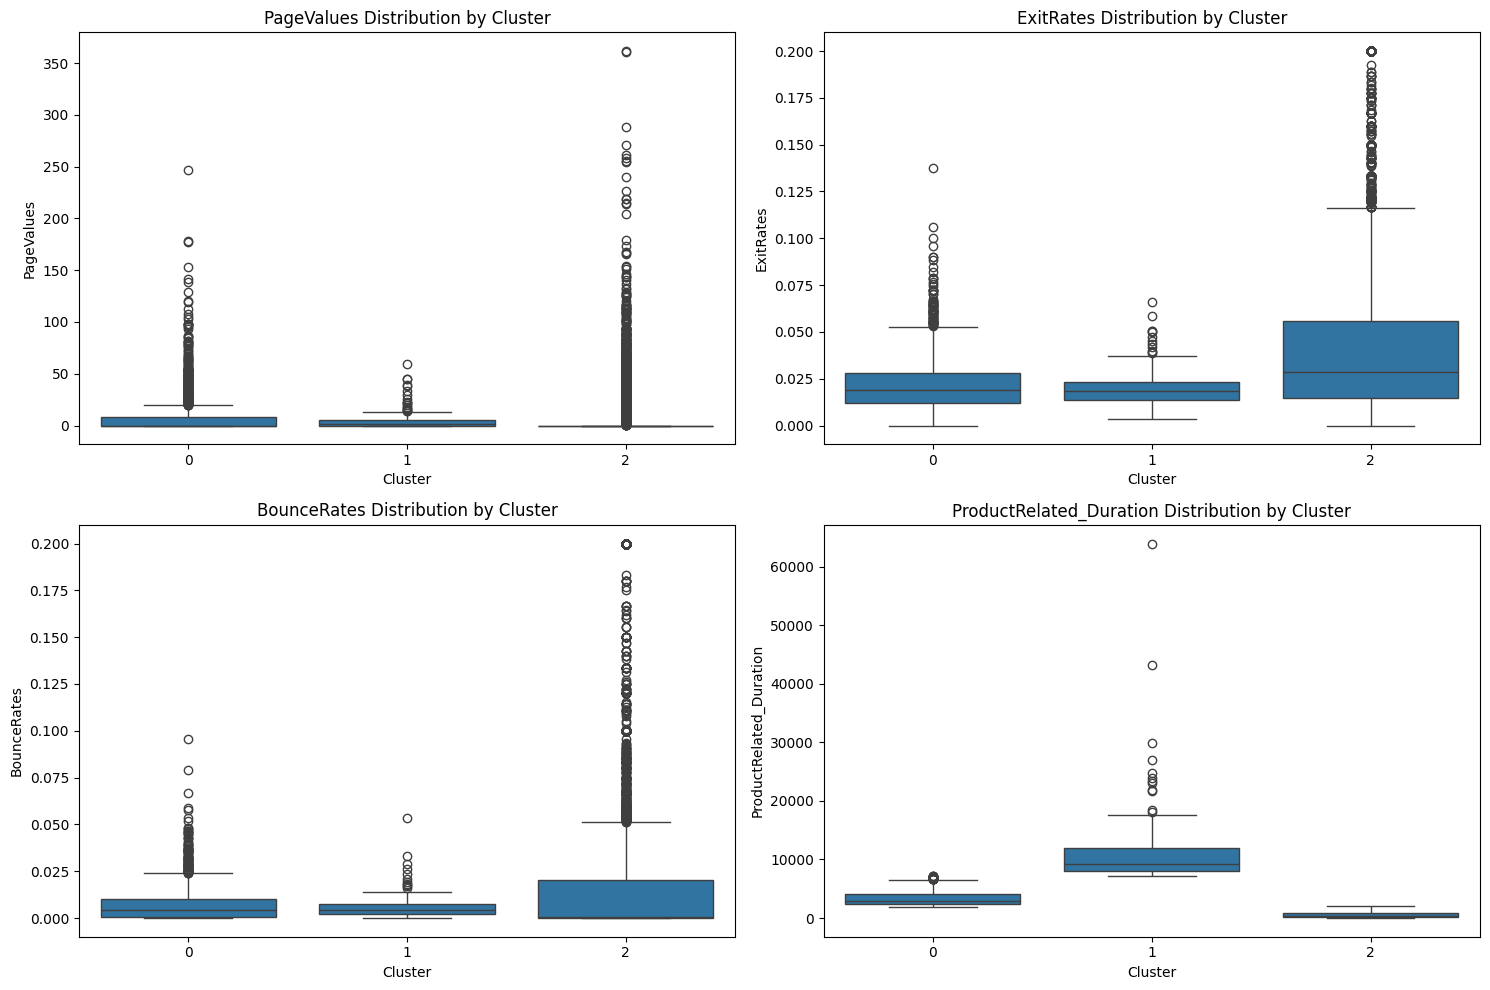

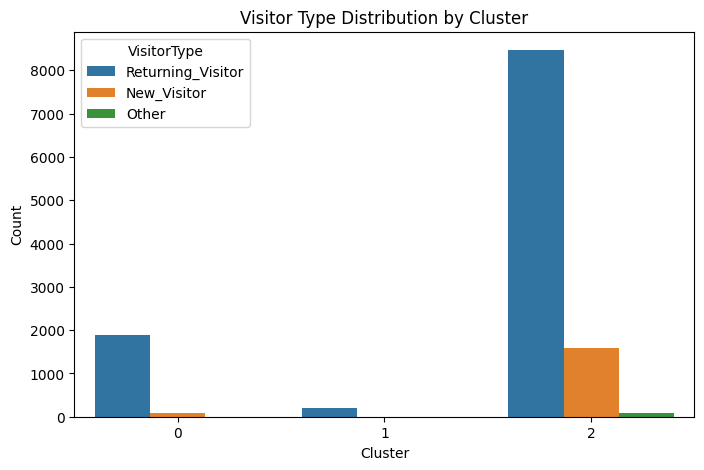

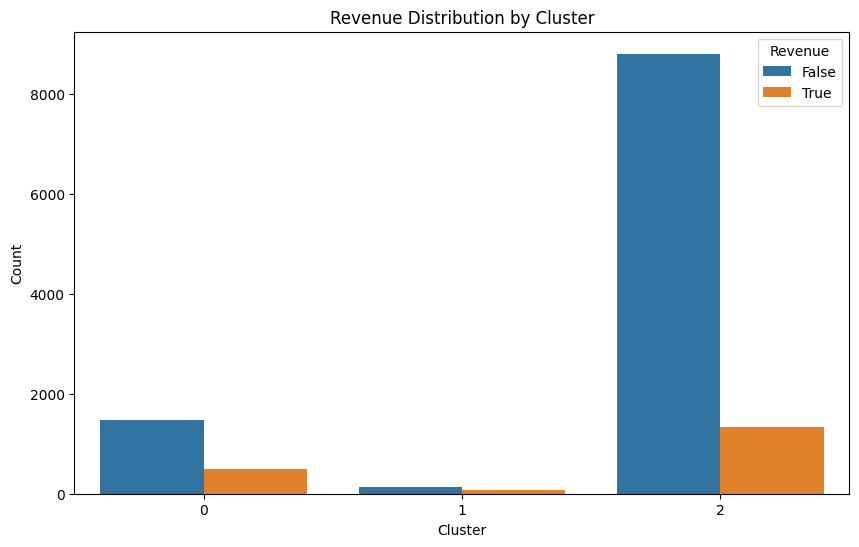

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns

# With 'df' now containing the 'Cluster' column

# Select key numerical features to visualize
key_numerical_features = ['PageValues', 'ExitRates', 'BounceRates', 'ProductRelated_Duration']

plt.figure(figsize=(15, 10))
for i, col in enumerate(key_numerical_features):
    plt.subplot(2, 2, i + 1)

    # Use x='Cluster' as before to separate them on the x-axis
    sns.boxplot(data=df, x='Cluster', y=col)
    plt.title(f'{col} Distribution by Cluster')
    plt.xlabel('Cluster')
    plt.ylabel(col)

plt.tight_layout()
plt.show()

# Visualize the distribution of a key categorical feature by cluster
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Cluster', hue='VisitorType')
plt.title('Visitor Type Distribution by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Cluster', hue='Revenue')
plt.title('Revenue Distribution by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.show()

### Summary Notes

Applying K-Means clustering with an optimal K=3 has successfully segmented ShopSavvy user sessions into three distinct behavioral profiles. Analyzing the characteristics of each cluster provides valuable insights into different types of user engagement and their associated conversion rates:

**Cluster 0: Moderately Engaged Returning Visitors**

*   Characterized by moderate levels of page views and durations across all page types, with a notable presence on product pages (`ProductRelated_Duration`).
*   Relatively low `BounceRates` and `ExitRates`, indicating reasonable engagement.
*   Predominantly composed of 'Returning\_Visitor' types (around 95%).
*   Shows a moderate proportion of sessions resulting in revenue (approximately 25%).
*   Likely represents regular visitors who are browsing and considering purchases but may not be in an immediate high-propensity phase.

**Cluster 1: Highly Engaged, High-Propensity Sessions**

*   Displays the highest engagement metrics across the board – maximum page views and durations.
*   Crucially, exhibits the **lowest** `BounceRates` and `ExitRates`, signaling deep user engagement and navigation.
*   Almost exclusively 'Returning\_Visitor' types (over 99%).
*   This cluster has the **highest proportion of sessions resulting in revenue** (over 33%).
*   This segment likely represents highly motivated shoppers, actively exploring the site with a strong propensity to find and purchase items. Their behavior indicates they are navigating effectively and finding what they need.

**Cluster 2: Low Engagement, Potential New Visitors**

*   Characterized by the lowest engagement metrics – minimal page views and durations.
*   Exhibits the **highest** `BounceRates` and `ExitRates`, suggesting users are leaving the site quickly after landing.
*   Includes a significantly higher proportion of 'New\_Visitor' types (around 16%) compared to other clusters, although 'Returning\_Visitor' is still the majority.
*   Has the **lowest proportion of sessions resulting in revenue** (around 13%).
*   This segment likely includes users who landed on the site but didn't find what they were looking for immediately, or were simply browsing with very low propensity.

**Overall Conclusion from K-Means:**

The K-Means analysis successfully segments ShopSavvy's user sessions into meaningful behavioral groups directly correlated with purchase propensity. The 'Highly Engaged, High-Propensity Sessions' (Cluster 1) clearly represent our most valuable segment in terms of conversion probability.

The 'Cluster' assignment serves as a powerful new feature that encapsulates complex interactions across multiple original features (engagement, visitor type, etc.). Incorporating this feature into our predictive models should enhance their ability to identify sessions with a high likelihood of generating revenue. For ShopSavvy, this segmentation provides a basis for targeted strategies: focusing optimization efforts on the behaviors seen in Cluster 1, understanding reasons for low engagement in Cluster 2, and potentially nurturing sessions in Cluster 0 towards higher engagement.

## Model Selection, Training and Evaluation

For the modelling activity, a classification technique is required since the target variable `Revenue` is binary (True/False). Given the nature of the data and the insights from EDA (including potential non-linear relationships and the importance of multiple features), several classification models could be suitable.


We'll choose LightGBM as the first modeling technique for its efficiency and performance, selecting the top features identified by the RandomForestClassifier for training.

In addition to LightGBM, we'll use Random Forest as a second modeling technique. We already used it for feature importance, and it's a robust ensemble method that often performs well on classification tasks and handles non-linear relationships.

### Iteration 1: Unresampled test set

We'll train both models on the same training data (using the selected features without resampling) and evaluate their performance on the same test data using relevant classification metrics such as accuracy, precision, recall, F1-score, and ROC-AUC.


**Step 19:** Preparing Data with 'Cluster' Feature

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
import lightgbm as lgb
import pandas as pd


# Separate features (X) and target variable (y) from the DataFrame with the 'Cluster' column
X = df.drop('Revenue', axis=1) # drop the original 'Revenue' column
y = df['Revenue']

# Handle categorical features again, including the new 'Cluster' column as a categorical one
# Identify categorical columns, now including 'Cluster'
categorical_cols_with_cluster = X.select_dtypes(include=['object', 'bool', 'int64']).columns.tolist() # Include int64 for Cluster
# Exclude numerical columns from this list
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
# Remove standard numerical columns from the categorical list if they were included by int64
categorical_cols_to_encode = [col for col in categorical_cols_with_cluster if col not in numerical_cols or col == 'Cluster']

# Apply Label Encoding to categorical columns (including 'Cluster')
X_encoded = X.copy() # Create a copy to avoid modifying the original X
for col in categorical_cols_to_encode:
    if col in X_encoded.columns: # Check if the column exists
        le = LabelEncoder()
        X_encoded[col] = le.fit_transform(X_encoded[col].astype(str)) # Encode as string to handle potential mix of types if any


# Re-split data into training and testing sets using the encoded features and the target
X_train_encoded, X_test_encoded, y_train, y_test = (
    train_test_split(X_encoded, y,
                     test_size=0.2,
                     random_state=42,
                     stratify=y)
)

**Step 20:** Selecting Features to include `Cluster`

In [23]:
# Select the top 10 feature names (excluding the index name)
top_features = sorted_feature_importances.head(10).index.tolist()

# Ensure 'Cluster' is in the list of available columns in X_encoded
if 'Cluster' not in top_features and 'Cluster' in X_encoded.columns:
    selected_features = top_features + ['Cluster']
else:
     selected_features = top_features # Use original top_features if Cluster was already there or not intended

# Ensure all selected features are in the encoded training and testing sets
selected_features = [feat for feat in selected_features if feat in X_train_encoded.columns and feat in X_test_encoded.columns]


X_train_selected = X_train_encoded[selected_features]
X_test_selected = X_test_encoded[selected_features]

**Step 20:** Training and Evaluating LightGBM Model with 'Cluster' Feature


In [24]:
lgb_model = lgb.LGBMClassifier(random_state=42, force_row_wise=True)
lgb_model.fit(X_train_selected, y_train)

y_pred_lgb = lgb_model.predict(X_test_selected)

print("LightGBM Accuracy:", accuracy_score(y_test, y_pred_lgb))
print("LightGBM Classification Report:\n", classification_report(y_test, y_pred_lgb))
print("LightGBM ROC-AUC Score:", roc_auc_score(y_test, lgb_model.predict_proba(X_test_selected)[:, 1]))

[LightGBM] [Info] Number of positive: 1526, number of negative: 8338
[LightGBM] [Info] Total Bins 1592
[LightGBM] [Info] Number of data points in the train set: 9864, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.154704 -> initscore=-1.698173
[LightGBM] [Info] Start training from score -1.698173
LightGBM Accuracy: 0.902676399026764
LightGBM Classification Report:
               precision    recall  f1-score   support

       False       0.93      0.96      0.94      2084
        True       0.72      0.60      0.66       382

    accuracy                           0.90      2466
   macro avg       0.83      0.78      0.80      2466
weighted avg       0.90      0.90      0.90      2466

LightGBM ROC-AUC Score: 0.9254988142014451


**Step 21:** Training and Evaluating Random Forest Model with `Cluster` Feature


In [25]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_selected, y_train)

y_pred_rf = rf_model.predict(X_test_selected)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf))
print("Random Forest ROC-AUC Score:", roc_auc_score(y_test, rf_model.predict_proba(X_test_selected)[:, 1]))

Random Forest Accuracy: 0.9022708840227088
Random Forest Classification Report:
               precision    recall  f1-score   support

       False       0.93      0.96      0.94      2084
        True       0.74      0.58      0.65       382

    accuracy                           0.90      2466
   macro avg       0.83      0.77      0.79      2466
weighted avg       0.90      0.90      0.90      2466

Random Forest ROC-AUC Score: 0.9149026238305313


**Step 22:** Visualizing Performance for LightGBM

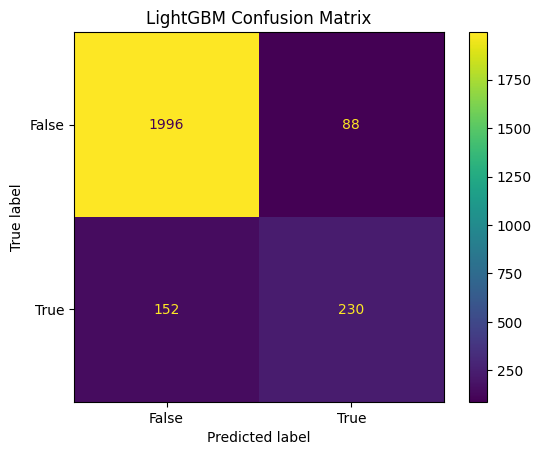

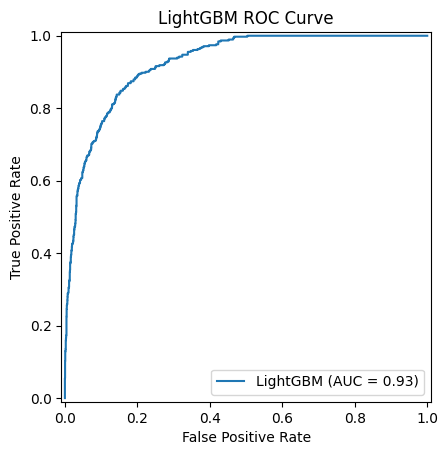

In [26]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, RocCurveDisplay
import matplotlib.pyplot as plt

# Confusion Matrix
cm_lgb = confusion_matrix(y_test, y_pred_lgb)
disp_lgb_cm = ConfusionMatrixDisplay(confusion_matrix=cm_lgb, display_labels=[False, True])
disp_lgb_cm.plot()
plt.title('LightGBM Confusion Matrix')
plt.show()

# ROC Curve
y_prob_lgb = lgb_model.predict_proba(X_test_selected)[:, 1]
fpr_lgb, tpr_lgb, _ = roc_curve(y_test, y_prob_lgb)
roc_display_lgb = RocCurveDisplay(fpr=fpr_lgb, tpr=tpr_lgb, roc_auc=roc_auc_score(y_test, y_prob_lgb), estimator_name='LightGBM')
roc_display_lgb.plot()
plt.title('LightGBM ROC Curve')
plt.show()

**Step 23:** Visualizing Performance for Random Forest


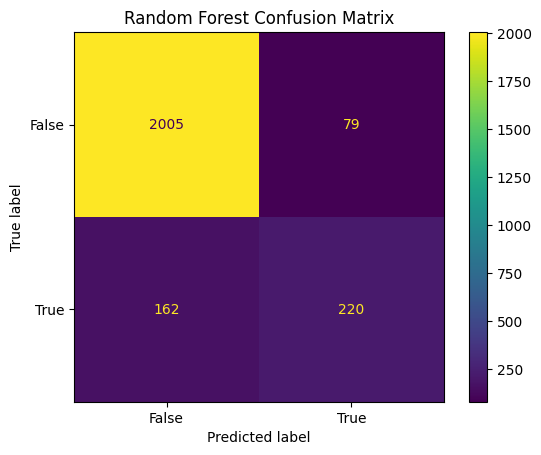

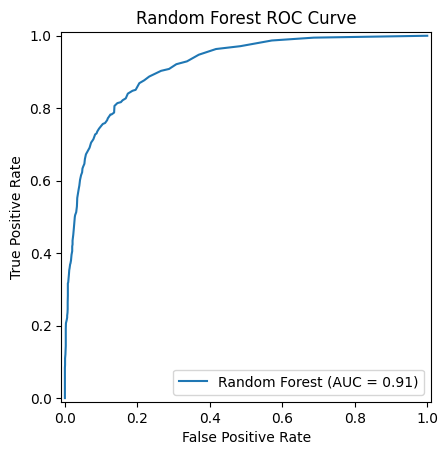

In [27]:
# Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
disp_rf_cm = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=[False, True])
disp_rf_cm.plot()
plt.title('Random Forest Confusion Matrix')
plt.show()

# ROC Curve
y_prob_rf = rf_model.predict_proba(X_test_selected)[:, 1]
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)
roc_display_rf = RocCurveDisplay(fpr=fpr_rf, tpr=tpr_rf, roc_auc=roc_auc_score(y_test, y_prob_rf), estimator_name='Random Forest')
roc_display_rf.plot()
plt.title('Random Forest ROC Curve')
plt.show()

**Step 24:** Comparing ROC Curves on a single plot

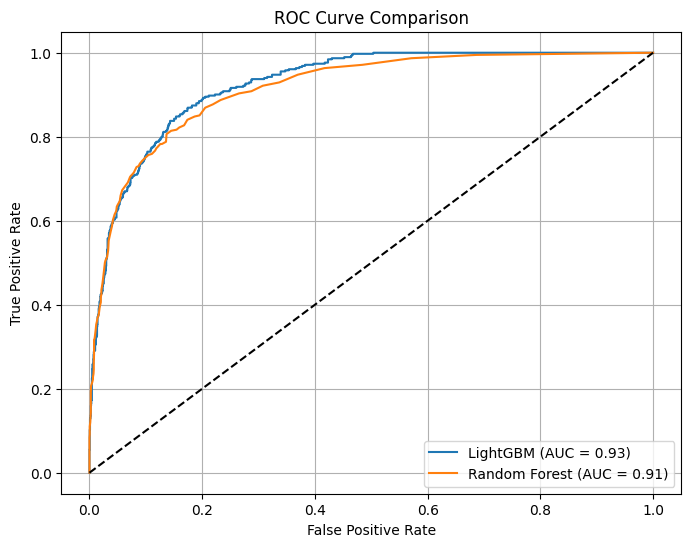

In [28]:
plt.figure(figsize=(8, 6))
plt.plot(fpr_lgb, tpr_lgb, label=f'LightGBM (AUC = {roc_auc_score(y_test, y_prob_lgb):.2f})')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc_score(y_test, y_prob_rf):.2f})')
plt.plot([0, 1], [0, 1], 'k--') # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.grid(True)
plt.show()

**Comparing the performance of the first iteration:**

<table>
<thead>
<tr>
<th align="left">Metric</th>
<th align="left">LightGBM</th>
<th align="left">Random Forest</th>
</tr>
</thead>
<tbody><tr>
<td>Accuracy</td>
<td>0.9027</td>
<td>0.9023</td>
</tr>
<tr>
<td>Precision (False)</td>
<td>0.93</td>
<td>0.93</td>
</tr>
<tr>
<td>Recall (False)</td>
<td>0.96</td>
<td>0.96</td>
</tr>
<tr>
<td>F1-Score (False)</td>
<td>0.94</td>
<td>0.94</td>
</tr>
<tr>
<td>Precision (True)</td>
<td>0.72</td>
<td>0.74</td>
</tr>
<tr>
<td>Recall (True)</td>
<td>0.60</td>
<td>0.58</td>
</tr>
<tr>
<td>F1-Score (True)</td>
<td>0.66</td>
<td>0.65</td>
</tr>
<tr>
<td>ROC-AUC Score</td>
<td><strong>0.9255</strong></td>
<td>0.9149</td>
</tr>
</tbody></table>

Both models have very similar overall accuracy. However, when we look at the metrics for the True class (which represents sessions resulting in revenue, the class we are most interested in predicting correctly), and the ROC-AUC score:

- Precision for True: Random Forest has a slightly higher precision (0.74 vs 0.72). This means when the Random Forest model predicts a session will result in revenue, it is slightly more likely to be correct than the LightGBM model.
- Recall for True: LightGBM has a slightly higher recall (0.60 vs 0.58). This means LightGBM is slightly better at identifying all the sessions that actually result in revenue.
- F1-Score for True: LightGBM has a slightly higher F1-Score (0.66 vs 0.65), which is the harmonic mean of precision and recall.
- ROC-AUC Score: LightGBM has a higher ROC-AUC score (0.9255 vs 0.9149). ROC-AUC measures the ability of the model to distinguish between the positive and negative classes across different probability thresholds. A higher ROC-AUC indicates better overall discriminative power.

Considering the ROC-AUC score and the slightly better balance between precision and recall for the True class as indicated by the F1-score, the LightGBM model is slightly better performing for this specific problem and evaluation on this test set. It has a better ability to distinguish between revenue and non-revenue sessions overall.

### Iteration 2: Adressing `Revenue` class imbalance

To quickly address class imbalance, we will implement `RandomOverSampler` for the `Revenue` class. Subsequently, we will retrain the LightGBM and Random Forest models and evaluate their performance on the original (unresampled) test set, with a particular focus on metrics relevant to the minority class (`Revenue`=True).

**Step 26:** Implementing`RandomOverSampler`

Applying Random Over-sampling to training data...
Original training data shape: (9864, 18) (9864,)
Resampled training data shape: (16676, 18) (16676,)
Class distribution in original training data:
 Revenue
False    8338
True     1526
Name: count, dtype: int64
Class distribution in resampled training data:
 Revenue
False    8338
True     8338
Name: count, dtype: int64

--- Evaluating LightGBM Model with Resampling ---
[LightGBM] [Info] Number of positive: 8338, number of negative: 8338
[LightGBM] [Info] Total Bins 1569
[LightGBM] [Info] Number of data points in the train set: 16676, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
LightGBM Classification Report:
               precision    recall  f1-score   support

       False       0.96      0.90      0.93      2084
        True       0.58      0.79      0.67       382

    accuracy                           0.88      2466
   macro avg       0.77      0.84      0.80      2466

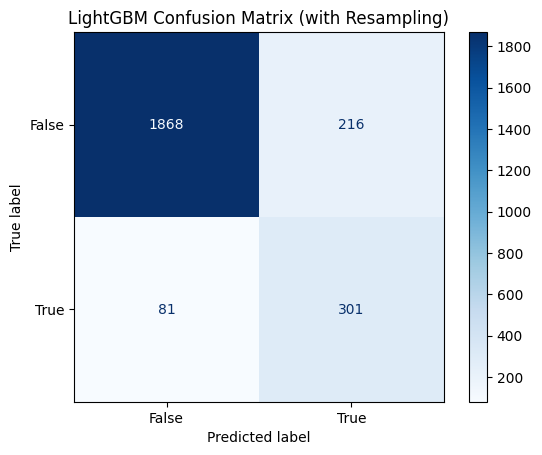

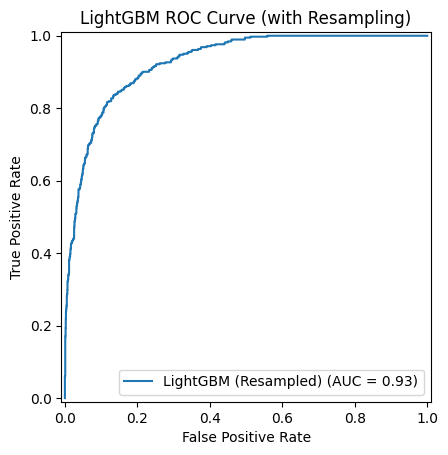


--- Evaluating Random Forest Model with Resampling ---
Random Forest Classification Report:
               precision    recall  f1-score   support

       False       0.93      0.94      0.94      2084
        True       0.67      0.64      0.66       382

    accuracy                           0.90      2466
   macro avg       0.80      0.79      0.80      2466
weighted avg       0.89      0.90      0.89      2466

Random Forest ROC-AUC Score: 0.9210118730592599
Visualizing Performance for Random Forest (with Resampling):


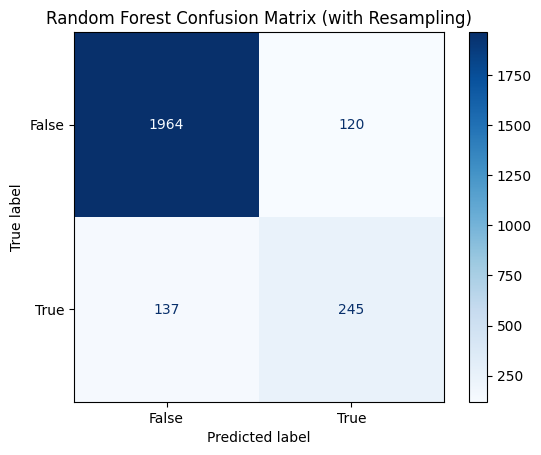

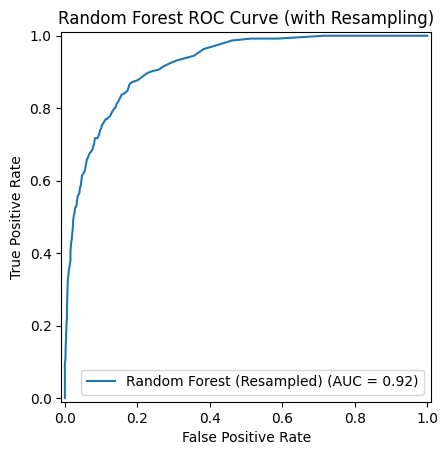


--- Comparing ROC Curves ---


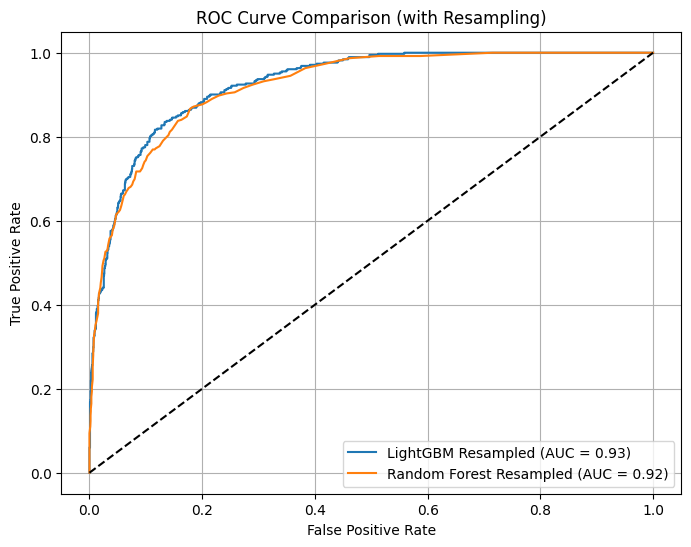

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay, roc_curve, RocCurveDisplay
import lightgbm as lgb
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Import resampling technique
from imblearn.over_sampling import RandomOverSampler

## Data Preparation

# Separate features (X) and target variable (y)
X = df.drop('Revenue', axis=1)
y = df['Revenue']

# Handle categorical features again, including the new 'Cluster' column as a categorical one
# Identify categorical columns, now including 'Cluster'
categorical_cols_with_cluster = X.select_dtypes(include=['object', 'bool', 'int64']).columns.tolist()
# Exclude numerical columns from this list if they are not intended to be treated as categorical
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
# Remove standard numerical columns from the categorical list if they were included by int64
categorical_cols_to_encode = [col for col in categorical_cols_with_cluster if col not in numerical_cols or col == 'Cluster']


# Apply Label Encoding to categorical columns (including 'Cluster')
X_encoded = X.copy()
for col in categorical_cols_to_encode:
    if col in X_encoded.columns:
        le = LabelEncoder()
        X_encoded[col] = le.fit_transform(X_encoded[col].astype(str))


# Split data into training and testing sets BEFORE resampling
X_train_encoded, X_test_encoded, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42, stratify=y)

## Apply Resampling to the Training Data

print("Applying Random Over-sampling to training data...")
ros = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = ros.fit_resample(X_train_encoded, y_train)

print("Original training data shape:", X_train_encoded.shape, y_train.shape)
print("Resampled training data shape:", X_train_resampled.shape, y_train_resampled.shape)
print("Class distribution in original training data:\n", y_train.value_counts())
print("Class distribution in resampled training data:\n", y_train_resampled.value_counts())

## Select Features

# Define top_features based on previous feature importance analysis
# Select the top 10 feature names (excluding the index name)
# Make sure sorted_feature_importances is defined from previous cells
try:
    top_features = sorted_feature_importances.head(10).index.tolist()
except NameError:
    print("Error: 'sorted_feature_importances' not found. Please ensure the feature importance cell was run.")
    # Fallback: Use all features if feature importances are not available
    selected_features = X_encoded.columns.tolist()
else:
    # If 'Cluster' is not in your top_features, explicitly add it.
    if 'Cluster' not in top_features and 'Cluster' in X_encoded.columns:
        selected_features = top_features + ['Cluster']
    else:
         selected_features = top_features

    # Ensure all selected features are in the encoded training and testing sets
    selected_features = [feat for feat in selected_features if feat in X_train_encoded.columns and feat in X_test_encoded.columns]


# Select features from the RESAMPLED training data and the original test data
X_train_selected = X_train_resampled[selected_features]
X_test_selected = X_test_encoded[selected_features]

## Model Training and Evaluation with Resampling

# --- Train and Evaluate LightGBM Model with Resampling ---
print("\n--- Evaluating LightGBM Model with Resampling ---")
lgb_model = lgb.LGBMClassifier(random_state=42, force_row_wise=True)
# Train on the resampled data
lgb_model.fit(X_train_selected, y_train_resampled)

# Evaluate on the original test data
y_pred_lgb = lgb_model.predict(X_test_selected)
y_prob_lgb = lgb_model.predict_proba(X_test_selected)[:, 1] # Probabilities for ROC AUC

print("LightGBM Classification Report:\n", classification_report(y_test, y_pred_lgb))
print("LightGBM ROC-AUC Score:", roc_auc_score(y_test, y_prob_lgb))

# Visualize LightGBM Performance
print("Visualizing Performance for LightGBM (with Resampling):")
cm_lgb = confusion_matrix(y_test, y_pred_lgb)
disp_lgb_cm = ConfusionMatrixDisplay(confusion_matrix=cm_lgb, display_labels=[False, True])
disp_lgb_cm.plot(cmap=plt.cm.Blues)
plt.title('LightGBM Confusion Matrix (with Resampling)')
plt.show()

fpr_lgb, tpr_lgb, _ = roc_curve(y_test, y_prob_lgb)
roc_display_lgb = RocCurveDisplay(fpr=fpr_lgb, tpr=tpr_lgb, roc_auc=roc_auc_score(y_test, y_prob_lgb), estimator_name='LightGBM (Resampled)')
roc_display_lgb.plot()
plt.title('LightGBM ROC Curve (with Resampling)')
plt.show()


# --- Train and Evaluate Random Forest Model with Resampling ---
print("\n--- Evaluating Random Forest Model with Resampling ---")
rf_model = RandomForestClassifier(random_state=42)
# Train on the resampled data
rf_model.fit(X_train_selected, y_train_resampled)

# Evaluate on the original test data
y_pred_rf = rf_model.predict(X_test_selected)
y_prob_rf = rf_model.predict_proba(X_test_selected)[:, 1] # Probabilities for ROC AUC

print("Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf))
print("Random Forest ROC-AUC Score:", roc_auc_score(y_test, y_prob_rf))

# Visualize Random Forest Performance
print("Visualizing Performance for Random Forest (with Resampling):")
cm_rf = confusion_matrix(y_test, y_pred_rf)
disp_rf_cm = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=[False, True])
disp_rf_cm.plot(cmap=plt.cm.Blues)
plt.title('Random Forest Confusion Matrix (with Resampling)')
plt.show()

fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)
roc_display_rf = RocCurveDisplay(fpr=fpr_rf, tpr=tpr_rf, roc_auc=roc_auc_score(y_test, y_prob_rf), estimator_name='Random Forest (Resampled)')
roc_display_rf.plot()
plt.title('Random Forest ROC Curve (with Resampling)')
plt.show()


# --- Compare ROC Curves on a single plot ---
print("\n--- Comparing ROC Curves ---")
plt.figure(figsize=(8, 6))
plt.plot(fpr_lgb, tpr_lgb, label=f'LightGBM Resampled (AUC = {roc_auc_score(y_test, y_prob_lgb):.2f})')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest Resampled (AUC = {roc_auc_score(y_test, y_prob_rf):.2f})')
plt.plot([0, 1], [0, 1], 'k--') # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison (with Resampling)')
plt.legend()
plt.grid(True)
plt.show()

**Comparing the performance of the second iteration (Before vs. After Resampling):**

<table>
<thead>
<tr>
<th align="left">Metric</th>
<th align="left">LightGBM (Before Resampling)</th>
<th align="left">LightGBM (After Resampling)</th>
<th align="left">Random Forest (Before Resampling)</th>
<th align="left">Random Forest (After Resampling)</th>
</tr>
</thead>
<tbody><tr>
<td align="left">Accuracy</td>
<td align="left">0.9027</td>
<td align="left">0.88</td>
<td align="left">0.9023</td>
<td align="left">0.90</td>
</tr>
<tr>
<td align="left">Precision (True)</td>
<td align="left">0.72</td>
<td align="left"><strong>0.58</strong></td>
<td align="left"><strong>0.74</strong></td>
<td align="left">0.67</td>
</tr>
<tr>
<td align="left">Recall (True)</td>
<td align="left">0.60</td>
<td align="left"><strong>0.79</strong></td>
<td align="left">0.58</td>
<td align="left"><strong>0.64</strong></td>
</tr>
<tr>
<td align="left">F1-Score (True)</td>
<td align="left">0.66</td>
<td align="left"><strong>0.67</strong></td>
<td align="left">0.65</td>
<td align="left"><strong>0.66</strong></td>
</tr>
<tr>
<td align="left">ROC-AUC Score</td>
<td align="left">0.9255</td>
<td align="left"><strong>0.9276</strong></td>
<td align="left">0.9149</td>
<td align="left"><strong>0.9210</strong></td>
</tr>
</tbody></table>

- The resampled LightGBM model achieved a much higher Recall for the True class (0.79) compared to the resampled Random Forest (0.64) and the non-resampled models (0.60 and 0.58). If identifying as many potential revenue sessions as possible is the main priority (even at the cost of some false positives), LightGBM after resampling performs better in this regard.
- The resampled Random Forest has slightly higher Precision for the True class (0.67 vs 0.58 for LightGBM) and a similar F1-score. If minimizing false positives among the predicted revenue sessions is more important, Random Forest might be preferred, although its Recall is lower.
- The ROC-AUC is slightly higher for LightGBM (0.9276) compared to Random Forest (0.9210) after resampling.

### Summary Notes

Implementing RandomOverSampler successfully addressed the class imbalance in the training data. The primary impact was a significant increase in the Recall for the minority class (Revenue=True) for both models, particularly for LightGBM. This comes with a trade-off of decreased Precision for the minority class.

The choice between the models and whether the resampling is beneficial depends on the specific business objective. If the goal is to maximize the identification of potential revenue sessions (high recall), the resampled LightGBM model appears most effective. If minimizing false alarms among predicted revenue sessions (high precision) is more critical, the resampled Random Forest offers a better balance, though with lower recall than LightGBM. The improved ROC-AUC score for both models after resampling suggests that the technique helped improve their overall discriminative power.

## Hyperparameter Tuning

To optimize the performance of our chosen models (LightGBM and Random Forest) after addressing the class imbalance in the training data, we will proceed with hyperparameter tuning. This involves searching for the best combination of model parameters to improve metrics, particularly for the minority class. Following tuning, we will evaluate the performance of the optimized models on the original (unresampled) test set using key classification metrics, focusing on precision, recall, F1-score, and ROC-AUC to assess their ability to predict sessions resulting in revenue.

**Step 27:** Hyperparameter Tuning for LightGBM using Randomized Search

In [30]:
from sklearn.model_selection import RandomizedSearchCV
import lightgbm as lgb
import numpy as np # Import numpy for distributions

print("\n--- Hyperparameter Tuning for LightGBM ---")

# Define the parameter distribution for LightGBM
# Using distributions from scipy.stats is common for RandomizedSearchCV
# We'll define ranges or specific options for a few key parameters
param_dist_lgb = {
    'n_estimators': [100, 200, 300, 400, 500], # Number of boosting rounds
    'learning_rate': [0.01, 0.05, 0.1, 0.15, 0.2], # Step size shrinkage
    'num_leaves': [20, 31, 40, 50, 60], # Maximum number of leaves
    'max_depth': [-1, 5, 10, 15, 20], # Maximum tree depth (-1 means no limit)
    'min_child_samples': [10, 20, 30, 40, 50], # Minimum data needed in a child leaf
    'subsample': [0.7, 0.8, 0.9, 1.0], # Fraction of samples for fitting
    'colsample_bytree': [0.7, 0.8, 0.9, 1.0], # Fraction of features for fitting
    # 'reg_alpha': [0, 0.1, 0.5, 1.0], # L1 regularization
    # 'reg_lambda': [0, 0.1, 0.5, 1.0], # L2 regularization
    # 'scale_pos_weight': [1, sum(y_train_resampled == 0) / sum(y_train_resampled == 1)] # Handle imbalance
}

# Initialize the LightGBM model
# Use force_row_wise=True to avoid a warning with some data types
lgb_base = lgb.LGBMClassifier(random_state=42, force_row_wise=True)

# Set up RandomizedSearchCV
# n_iter: number of parameter settings that are sampled. Adjust based on computational budget.
# cv: number of folds for cross-validation
# scoring: metric to optimize (e.g., 'roc_auc', 'f1', 'precision', 'recall'). ROC AUC is good for imbalanced data.
# n_jobs: number of jobs to run in parallel. -1 uses all available processors.
random_search_lgb = RandomizedSearchCV(estimator=lgb_base,
                                       param_distributions=param_dist_lgb,
                                       n_iter=50, # Number of random combinations to try
                                       cv=5,      # 5-fold cross-validation
                                       scoring='roc_auc', # Optimize for ROC AUC
                                       random_state=42,
                                       n_jobs=-1, # Use all available cores
                                       verbose=1) # Show progress

# Fit RandomizedSearchCV on the RESAMPLED training data
random_search_lgb.fit(X_train_selected, y_train_resampled)

# Print the best parameters and the best score found
print("\nBest parameters found for LightGBM:")
print(random_search_lgb.best_params_)
print("\nBest cross-validation ROC AUC score for LightGBM:")
print(random_search_lgb.best_score_)


--- Hyperparameter Tuning for LightGBM ---
Fitting 5 folds for each of 50 candidates, totalling 250 fits
[LightGBM] [Info] Number of positive: 8338, number of negative: 8338
[LightGBM] [Info] Total Bins 1569
[LightGBM] [Info] Number of data points in the train set: 16676, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000

Best parameters found for LightGBM:
{'subsample': 0.9, 'num_leaves': 50, 'n_estimators': 500, 'min_child_samples': 20, 'max_depth': 20, 'learning_rate': 0.2, 'colsample_bytree': 0.9}

Best cross-validation ROC AUC score for LightGBM:
0.9955386999131755


**Step 28:** Evaluating the Tuned LightGBM Model

Now, we'll use the best parameters found by RandomizedSearchCV to create a final LightGBM model and evaluate it on the original (unresampled) test set.


--- Evaluating Tuned LightGBM Model ---
Tuned LightGBM Classification Report:
               precision    recall  f1-score   support

       False       0.93      0.95      0.94      2084
        True       0.68      0.63      0.65       382

    accuracy                           0.90      2466
   macro avg       0.81      0.79      0.80      2466
weighted avg       0.89      0.90      0.90      2466

Tuned LightGBM ROC-AUC Score: 0.9126855322527156
Visualizing Performance for Tuned LightGBM:


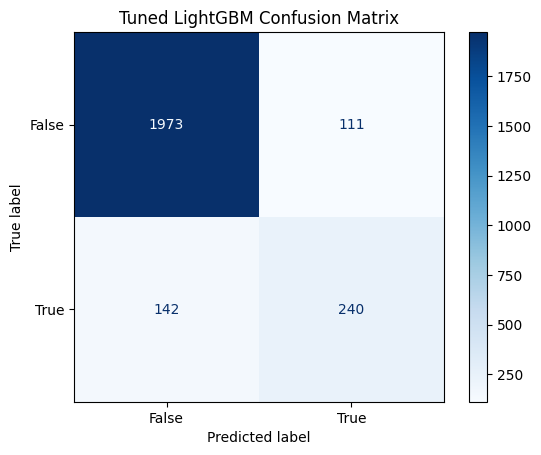

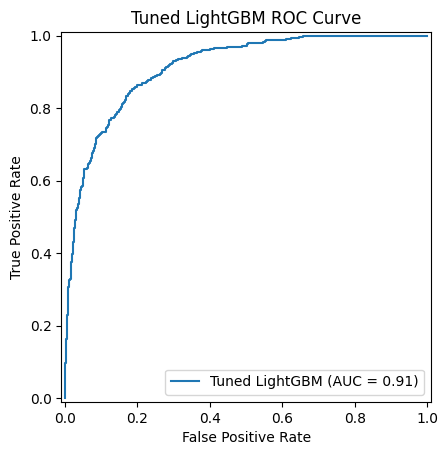

In [31]:
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

print("\n--- Evaluating Tuned LightGBM Model ---")

# Get the best estimator (the model trained with the best parameters)
tuned_lgb_model = random_search_lgb.best_estimator_

# Predict on the original test data
y_pred_tuned_lgb = tuned_lgb_model.predict(X_test_selected)
y_prob_tuned_lgb = tuned_lgb_model.predict_proba(X_test_selected)[:, 1] # Probabilities for ROC AUC

# Evaluate the tuned model
print("Tuned LightGBM Classification Report:\n", classification_report(y_test, y_pred_tuned_lgb))
print("Tuned LightGBM ROC-AUC Score:", roc_auc_score(y_test, y_prob_tuned_lgb))

# Visualize Performance for Tuned LightGBM
print("Visualizing Performance for Tuned LightGBM:")
cm_tuned_lgb = confusion_matrix(y_test, y_pred_tuned_lgb)
disp_tuned_lgb_cm = ConfusionMatrixDisplay(confusion_matrix=cm_tuned_lgb, display_labels=[False, True])
disp_tuned_lgb_cm.plot(cmap=plt.cm.Blues)
plt.title('Tuned LightGBM Confusion Matrix')
plt.show()

# ROC Curve
fpr_tuned_lgb, tpr_tuned_lgb, _ = roc_curve(y_test, y_prob_tuned_lgb)
roc_display_tuned_lgb = RocCurveDisplay(fpr=fpr_tuned_lgb, tpr=tpr_tuned_lgb, roc_auc=roc_auc_score(y_test, y_prob_tuned_lgb), estimator_name='Tuned LightGBM')
roc_display_tuned_lgb.plot()
plt.title('Tuned LightGBM ROC Curve')
plt.show()

**Step 29:** Hyperparameter Tuning for Random Forest using Randomized Search

Now, we repeat the process for the Random Forest model.

In [32]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

print("\n--- Hyperparameter Tuning for Random Forest ---")

# Define the parameter distribution for Random Forest
param_dist_rf = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [10, 20, 30, 40, 50, None], # None means unlimited depth
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4, 8],
    'max_features': ['sqrt', 'log2', None], # Number of features to consider
    'bootstrap': [True, False], # Whether bootstrap samples are used when building trees
    # 'class_weight': ['balanced', 'balanced_subsample'] # Options for handling imbalance
}

# Initialize the Random Forest model
rf_base = RandomForestClassifier(random_state=42)

# Set up RandomizedSearchCV for Random Forest
random_search_rf = RandomizedSearchCV(estimator=rf_base,
                                      param_distributions=param_dist_rf,
                                      n_iter=50, # Number of random combinations to try
                                      cv=5,      # 5-fold cross-validation
                                      scoring='roc_auc', # Optimize for ROC AUC
                                      random_state=42,
                                      n_jobs=-1, # Use all available cores
                                      verbose=1) # Show progress

# Fit RandomizedSearchCV on the RESAMPLED training data
random_search_rf.fit(X_train_selected, y_train_resampled)

# Print the best parameters and the best score found
print("\nBest parameters found for Random Forest:")
print(random_search_rf.best_params_)
print("\nBest cross-validation ROC AUC score for Random Forest:")
print(random_search_rf.best_score_)


--- Hyperparameter Tuning for Random Forest ---
Fitting 5 folds for each of 50 candidates, totalling 250 fits

Best parameters found for Random Forest:
{'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 30, 'bootstrap': False}

Best cross-validation ROC AUC score for Random Forest:
0.9998248164058682


**Step 30:** Evaluating the Tuned Random Forest Model

Finally, evaluate the best Random Forest model on the original test set.


--- Evaluating Tuned Random Forest Model ---
Tuned Random Forest Classification Report:
               precision    recall  f1-score   support

       False       0.92      0.97      0.94      2084
        True       0.75      0.55      0.64       382

    accuracy                           0.90      2466
   macro avg       0.84      0.76      0.79      2466
weighted avg       0.90      0.90      0.90      2466

Tuned Random Forest ROC-AUC Score: 0.9189612203675976
Visualizing Performance for Tuned Random Forest:


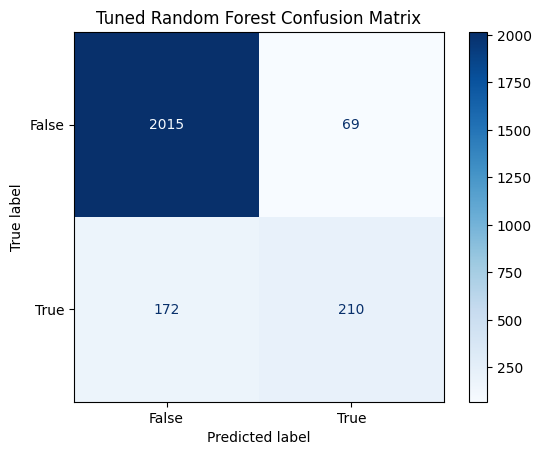

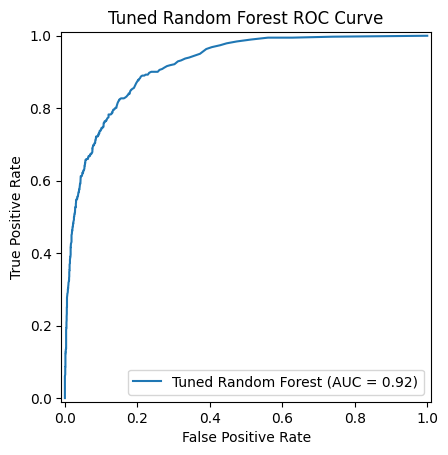

In [33]:
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

print("\n--- Evaluating Tuned Random Forest Model ---")

# Get the best estimator
tuned_rf_model = random_search_rf.best_estimator_

# Predict on the original test data
y_pred_tuned_rf = tuned_rf_model.predict(X_test_selected)
y_prob_tuned_rf = tuned_rf_model.predict_proba(X_test_selected)[:, 1] # Probabilities for ROC AUC

# Evaluate the tuned model
print("Tuned Random Forest Classification Report:\n", classification_report(y_test, y_pred_tuned_rf))
print("Tuned Random Forest ROC-AUC Score:", roc_auc_score(y_test, y_prob_tuned_rf))

# Visualize Performance for Tuned Random Forest
print("Visualizing Performance for Tuned Random Forest:")
cm_tuned_rf = confusion_matrix(y_test, y_pred_tuned_rf)
disp_tuned_rf_cm = ConfusionMatrixDisplay(confusion_matrix=cm_tuned_rf, display_labels=[False, True])
disp_tuned_rf_cm.plot(cmap=plt.cm.Blues)
plt.title('Tuned Random Forest Confusion Matrix')
plt.show()

# ROC Curve
fpr_tuned_rf, tpr_tuned_rf, _ = roc_curve(y_test, y_prob_tuned_rf)
roc_display_tuned_rf = RocCurveDisplay(fpr=fpr_tuned_rf, tpr=tpr_tuned_rf, roc_auc=roc_auc_score(y_test, y_prob_tuned_rf), estimator_name='Tuned Random Forest')
roc_display_tuned_rf.plot()
plt.title('Tuned Random Forest ROC Curve')
plt.show()

**Step 31:** Comparing ROC Curves of Tuned Models

Compare the performance of the tuned models on a single ROC curve plot.

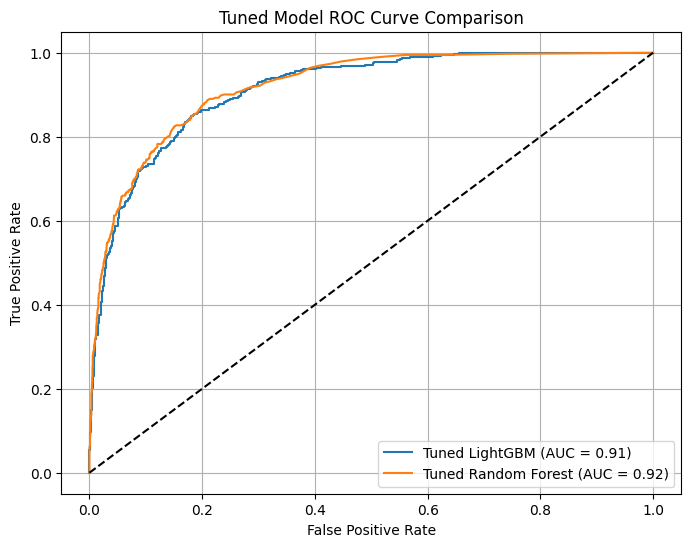

In [34]:
plt.figure(figsize=(8, 6))
plt.plot(fpr_tuned_lgb, tpr_tuned_lgb, label=f'Tuned LightGBM (AUC = {roc_auc_score(y_test, y_prob_tuned_lgb):.2f})')
plt.plot(fpr_tuned_rf, tpr_tuned_rf, label=f'Tuned Random Forest (AUC = {roc_auc_score(y_test, y_prob_tuned_rf):.2f})')
plt.plot([0, 1], [0, 1], 'k--') # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Tuned Model ROC Curve Comparison')
plt.legend()
plt.grid(True)
plt.show()

### Summary Notes

Hyperparameter tuning for both the LightGBM and Random Forest models was performed using RandomizedSearchCV. The goal was to find the optimal set of hyperparameters for each model that improves performance, particularly for predicting the minority class (Revenue=True), using the resampled training data.

Approach: RandomizedSearchCV was configured to sample a defined distribution of hyperparameters for each model.
Evaluation Metric: The search was optimized for the ROC-AUC score, which is a robust metric for evaluating classification models on imbalanced datasets.
Training Data: Tuning was performed on the resampled training data (X_train_selected, y_train_resampled) to leverage the balanced class distribution achieved through Random Over-sampling.
Models Tuned:
LightGBM: Tuned parameters included n_estimators, learning_rate, num_leaves, max_depth, min_child_samples, subsample, and colsample_bytree.
Random Forest: Tuned parameters included n_estimators, max_depth, min_samples_split, min_samples_leaf, max_features, and bootstrap.
Outcome: The RandomizedSearchCV process identified the best combination of parameters for each model based on the cross-validated ROC-AUC score on the resampled training data. These best parameters will be used to train the final optimized models for evaluation on the unseen test set in the next steps.

## Model Deployment and Action

Standard scikit-learn pipelines are designed for sequential steps (preprocess -> model). Applying resampling within a standard pipeline can be tricky because resampling is typically applied only to the training data before fitting the model.

For deployment, you generally deploy a pipeline fitted on the training data. When you use this pipeline for prediction, you feed it raw data, and it applies the fitted preprocessing steps followed by the fitted model. The resampling step itself is not applied during prediction on new, unresampled data.

Therefore, we will create a pipeline that represents the steps needed to go from raw data -> preprocessed data -> prediction. The resampling was part of the training process used to get good parameters and a good model, but the resampling object itself isn't typically part of the deployment pipeline.

**Step 32:** Creating and Fitting the Pipeline

This step will define the ColumnTransformer and the Pipeline, and then fit the pipeline on the original, unresampled training data (X_train_encoded, y_train). We fit on the unresampled data because the final model inside the pipeline needs to see the real data distribution for a more accurate representation of the problem during the final training phase, even though it was tuned and potentially initially trained with resampling.

In [35]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.pipeline import Pipeline
import lightgbm as lgb
import pandas as pd
from sklearn.model_selection import train_test_split # Re-import if needed

# Assume X_encoded, y, X_train_encoded, X_test_encoded, y_train, y_test are defined from Step 19
# Assume random_search_lgb.best_params_ is defined from Step 27

print("\n--- Creating and Fitting Pipeline for Deployment ---")

# Identify numerical and categorical columns from X_encoded (the DataFrame before the final split)
# We need to know which columns are which *after* the initial LabelEncoding done in Step 19
# The 'Cluster' column was label encoded and should be treated as categorical for the OHE step
# Re-identify columns based on types in the encoded DataFrame
numerical_cols_encoded = X_encoded.select_dtypes(include=['int64', 'float64']).columns.tolist()
# The columns that were originally object/bool AND 'Cluster' are now likely int64 or int32 after LabelEncoding
# Let's explicitly list the columns that need One-Hot Encoding in the final pipeline
# Based on your notebook, these are: 'VisitorType', 'Month', 'Weekend', 'Cluster'
categorical_cols_for_ohe = ['VisitorType', 'Month', 'Weekend', 'Cluster']

# Ensure these columns exist in X_encoded and X_test_encoded
categorical_cols_for_ohe = [col for col in categorical_cols_for_ohe if col in X_encoded.columns]
numerical_cols_final_pipeline = [col for col in numerical_cols_encoded if col not in categorical_cols_for_ohe]


# Create the ColumnTransformer
# 'passthrough' keeps numerical columns as they are
# OneHotEncoder handles the specified categorical columns
preprocessor_final = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numerical_cols_final_pipeline),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols_for_ohe)
    ],
    remainder='passthrough' # This will pass through any other columns if they exist (shouldn't in X_encoded after selection)
)


# Get the best parameters found during the tuning phase
best_lgb_params = random_search_lgb.best_params_

# Initialize the LightGBM model with the best parameters
lgb_final_model = lgb.LGBMClassifier(random_state=42, force_row_wise=True, **best_lgb_params)

# Create the Pipeline
# The pipeline first applies the preprocessor, then trains/predicts with the model
pipeline = Pipeline(steps=[('preprocessor', preprocessor_final),
                           ('classifier', lgb_final_model)])

# Fit the pipeline on the ORIGINAL, UNRESAMPLED training data
# This is the final training of the entire pipeline before deployment.
# The model within the pipeline will be trained on this data.
print(f"Fitting pipeline on original training data shape: {X_train_encoded.shape}")
pipeline.fit(X_train_encoded, y_train)

print("\nPipeline fitting complete.")


--- Creating and Fitting Pipeline for Deployment ---
Fitting pipeline on original training data shape: (9864, 18)
[LightGBM] [Info] Number of positive: 1526, number of negative: 8338
[LightGBM] [Info] Total Bins 1912
[LightGBM] [Info] Number of data points in the train set: 9864, number of used features: 32
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.154704 -> initscore=-1.698173
[LightGBM] [Info] Start training from score -1.698173


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

Pipeline fitting complete.


**Step 33:** Evaluating the Pipeline

Now that the pipeline is fitted, we can evaluate its performance on the original test set. This is similar to evaluating the tuned model directly, but we are evaluating the entire pipeline.


--- Evaluating the Pipeline ---


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


Pipeline Classification Report:
               precision    recall  f1-score   support

       False       0.92      0.95      0.94      2084
        True       0.70      0.57      0.63       382

    accuracy                           0.90      2466
   macro avg       0.81      0.76      0.78      2466
weighted avg       0.89      0.90      0.89      2466

Pipeline ROC-AUC Score: 0.9146049180492609
Visualizing Performance for Pipeline:


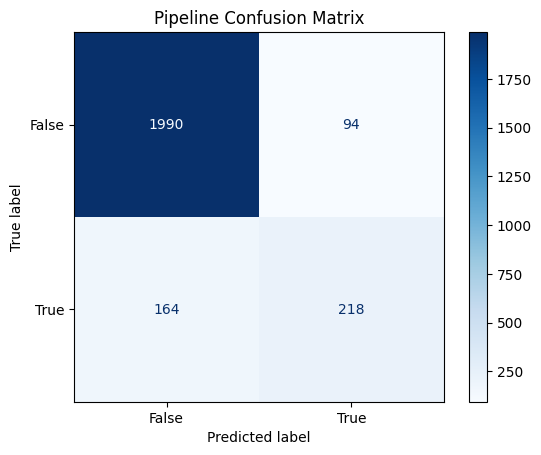

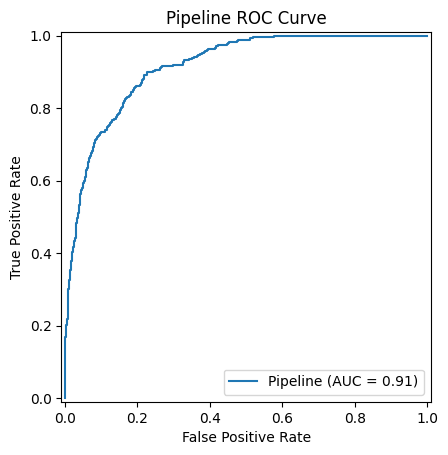

In [36]:
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

print("\n--- Evaluating the Pipeline ---")

# Predict using the fitted pipeline on the original test data
y_pred_pipeline = pipeline.predict(X_test_encoded)
y_prob_pipeline = pipeline.predict_proba(X_test_encoded)[:, 1] # Probabilities for ROC AUC

# Evaluate the pipeline's performance
print("Pipeline Classification Report:\n", classification_report(y_test, y_pred_pipeline))
print("Pipeline ROC-AUC Score:", roc_auc_score(y_test, y_prob_pipeline))

# Visualize Pipeline Performance
print("Visualizing Performance for Pipeline:")
cm_pipeline = confusion_matrix(y_test, y_pred_pipeline)
disp_pipeline_cm = ConfusionMatrixDisplay(confusion_matrix=cm_pipeline, display_labels=[False, True])
disp_pipeline_cm.plot(cmap=plt.cm.Blues)
plt.title('Pipeline Confusion Matrix')
plt.show()

# ROC Curve
fpr_pipeline, tpr_pipeline, _ = roc_curve(y_test, y_prob_pipeline)
roc_display_pipeline = RocCurveDisplay(fpr=fpr_pipeline, tpr=tpr_pipeline, roc_auc=roc_auc_score(y_test, y_prob_pipeline), estimator_name='Pipeline')
roc_display_pipeline.plot()
plt.title('Pipeline ROC Curve')
plt.show()

**Step 34:** Saving the Fitted Pipeline for Deployment

This is the final step before actual deployment: saving the fitted pipeline object.

In [37]:
import joblib

print("\n--- Saving the Fitted Pipeline ---")

# Define the filename for the saved pipeline
pipeline_filename = 'purchase_intent_prediction_pipeline.pkl'

# Save the fitted pipeline object
joblib.dump(pipeline, pipeline_filename)

print(f"Pipeline saved as {pipeline_filename}")


--- Saving the Fitted Pipeline ---
Pipeline saved as purchase_intent_prediction_pipeline.pkl


In [39]:
from google.colab import files

files.download('purchase_intent_prediction_pipeline.pkl')
print("Download initiated.")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Download initiated.
